In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
# ============================
# 1. Cargar todos los escenarios
# ============================
carpeta = "."  # Ruta donde están los archivos
archivos = [f for f in os.listdir(carpeta) if f.startswith("Esc") and f.endswith(".xlsx")]

df_todos = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)
    
    # Leer hoja RESUMEN
    if "RESUMEN" in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name="RESUMEN")
        df["Escenario"] = archivo.replace(".xlsx", "")
        df_todos = pd.concat([df_todos, df], ignore_index=True)

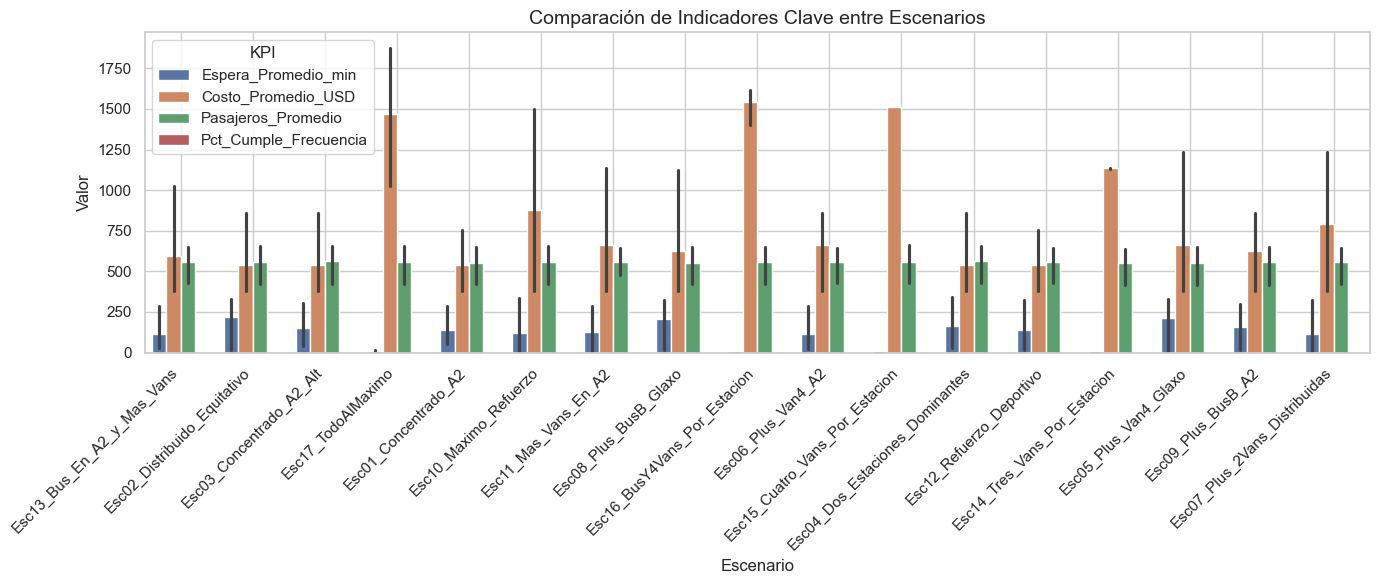

In [36]:

# ============================
# 2. Barras comparativas por estación
# ============================
kpis = ['Espera_Promedio_min', 'Costo_Promedio_USD', 'Pasajeros_Promedio', 'Pct_Cumple_Frecuencia']
df_kpi = df_todos.melt(id_vars=['Escenario', 'Estacion'], value_vars=kpis, var_name='KPI', value_name='Valor')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_kpi, x='Escenario', y='Valor', hue='KPI')
plt.title("Comparación de Indicadores Clave entre Escenarios")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()

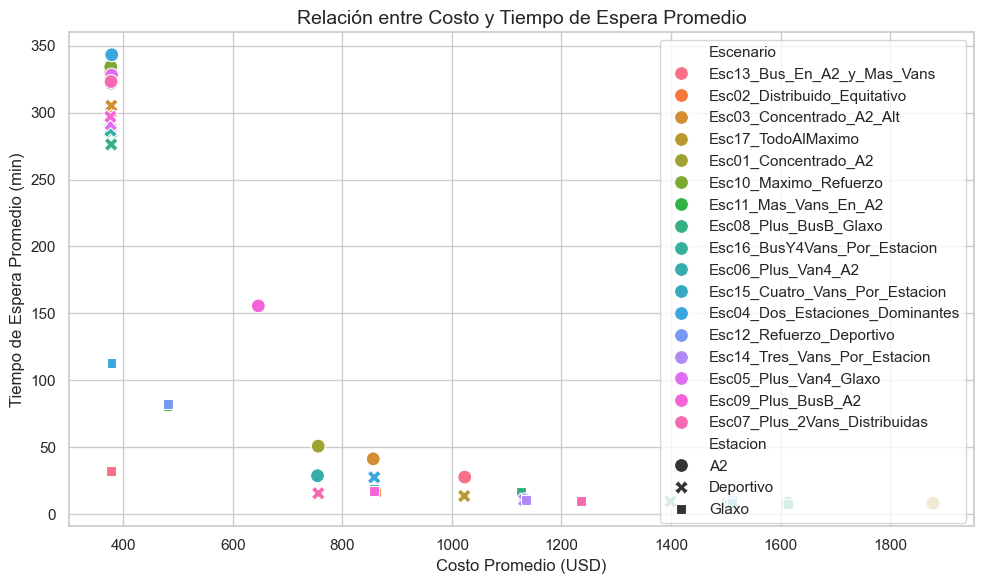

In [37]:
# ============================
# 3. Dispersión: Costo vs Tiempo de Espera
# ============================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_todos, x='Costo_Promedio_USD', y='Espera_Promedio_min',
                hue='Escenario', style='Estacion', s=100)
plt.title("Relación entre Costo y Tiempo de Espera Promedio")
plt.xlabel("Costo Promedio (USD)")
plt.ylabel("Tiempo de Espera Promedio (min)")
plt.grid(True)
plt.tight_layout()
plt.show()


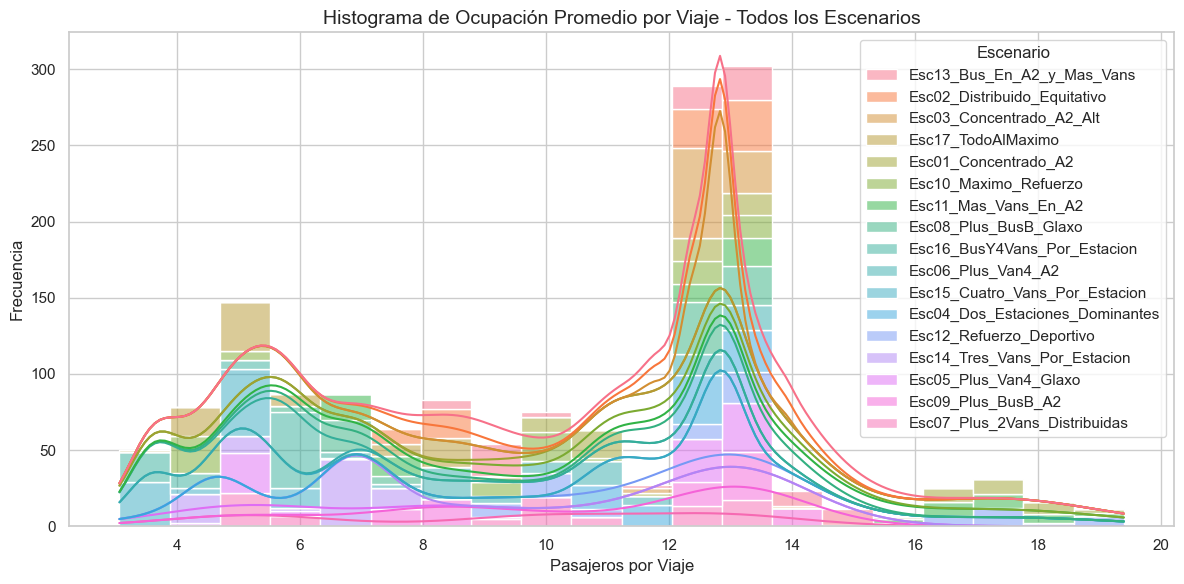

In [38]:
carpeta = "."  # Asegúrate de estar en el mismo directorio que los archivos .xlsx
archivos = [f for f in os.listdir(carpeta) if f.startswith("Esc") and f.endswith(".xlsx")]
df_ocupacion_total = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    # Todas las hojas menos RESUMEN
    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        # Verificamos que la columna exista
        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo.replace(".xlsx", "")
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# ===============================
# Histograma de ocupación
# ===============================
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ocupacion_total, 
             x="Pasajeros_Transportados_Promedio", 
             hue="Escenario", 
             bins=20, 
             kde=True, 
             multiple="stack")

plt.title("Histograma de Ocupación Promedio por Viaje - Todos los Escenarios")
plt.xlabel("Pasajeros por Viaje")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

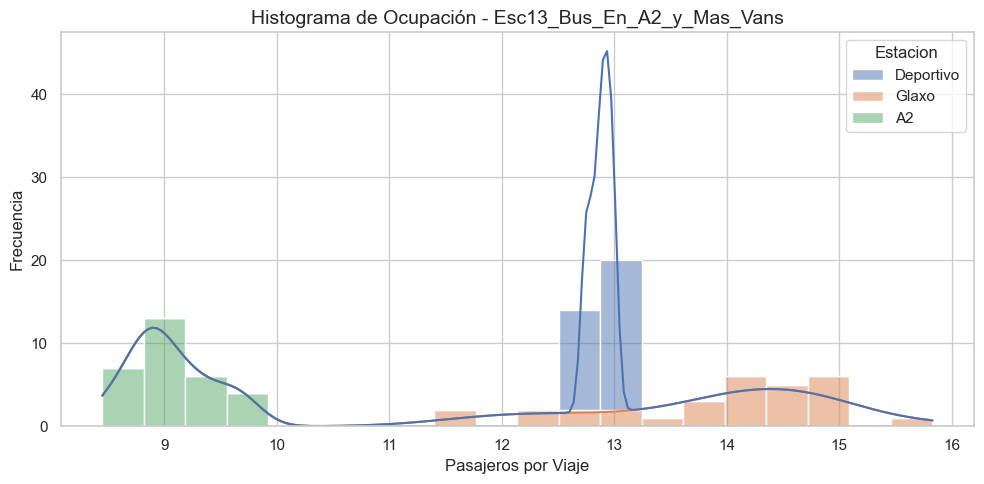

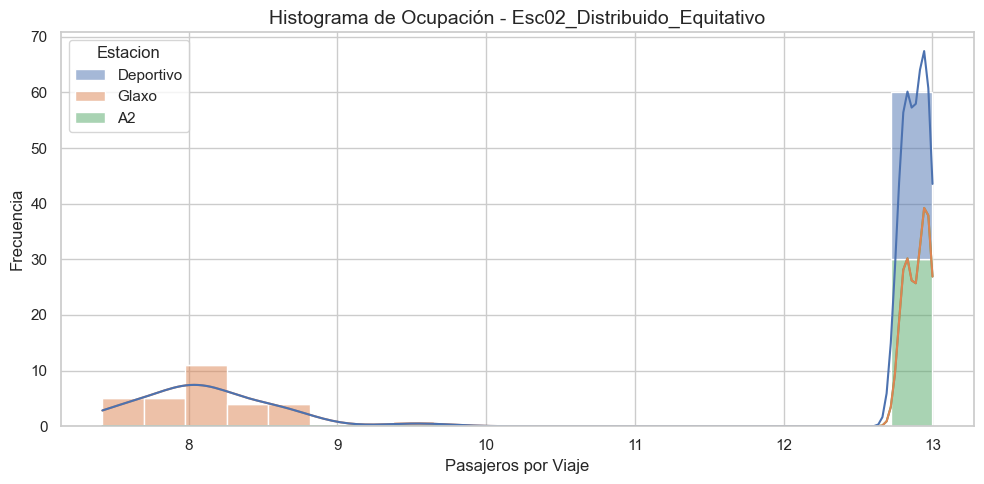

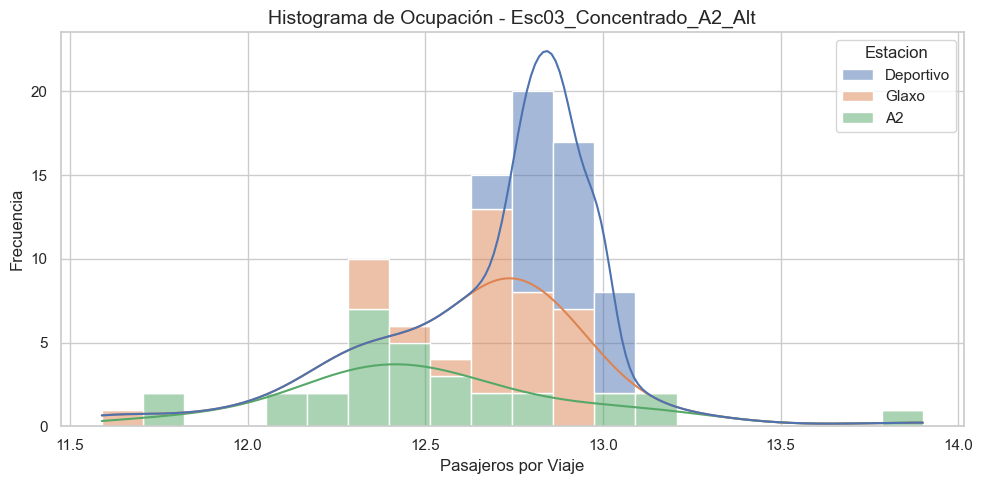

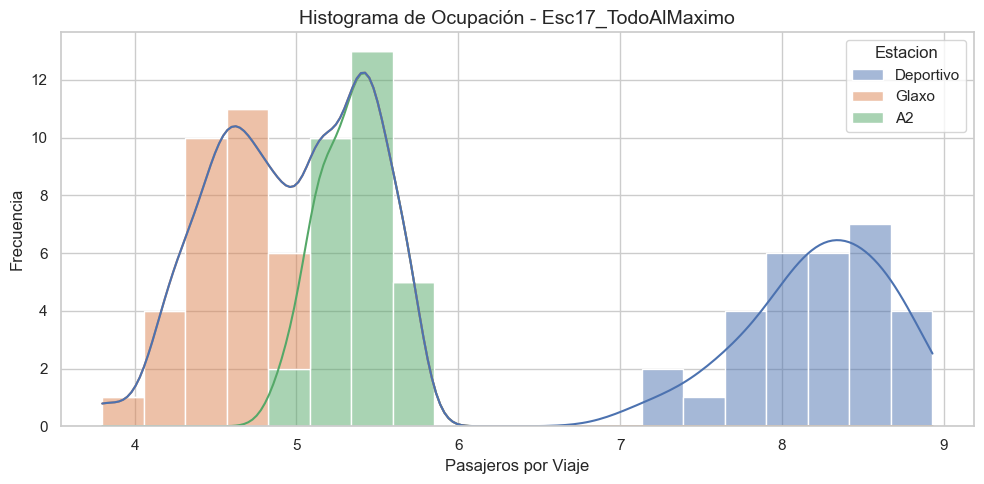

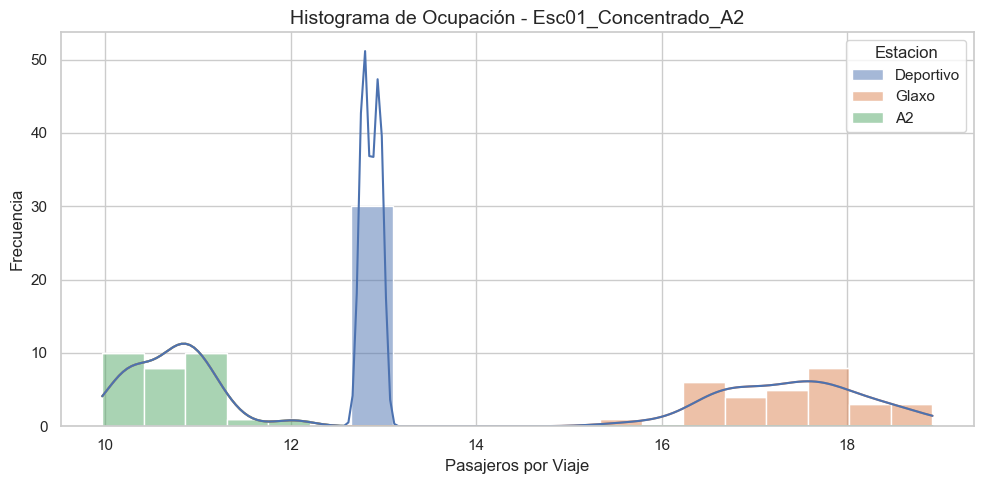

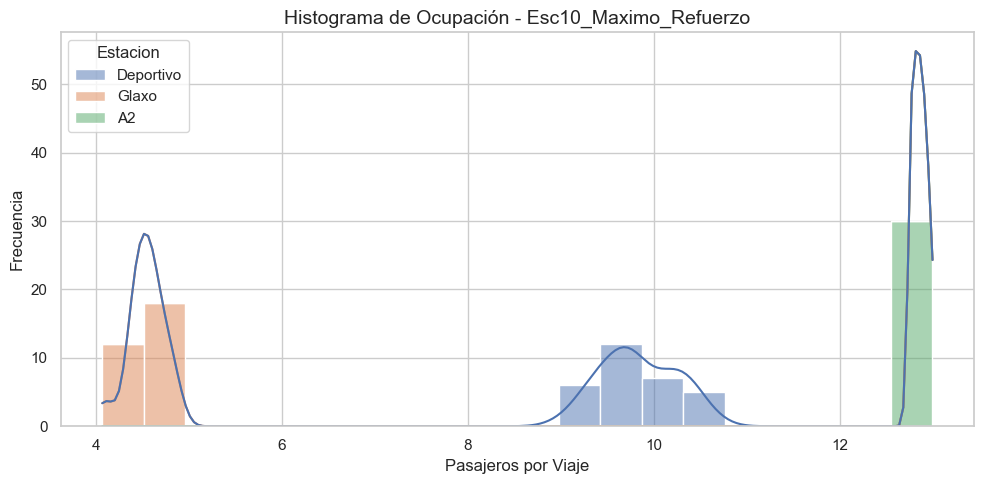

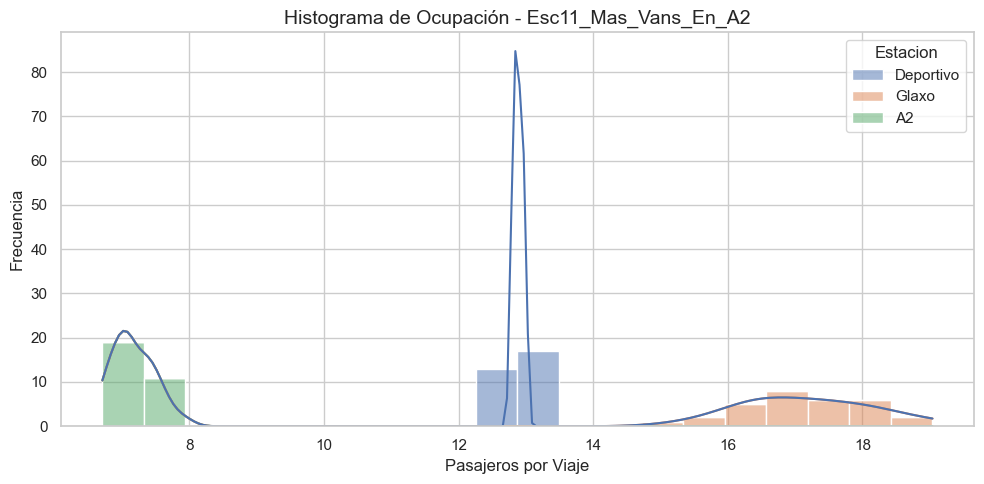

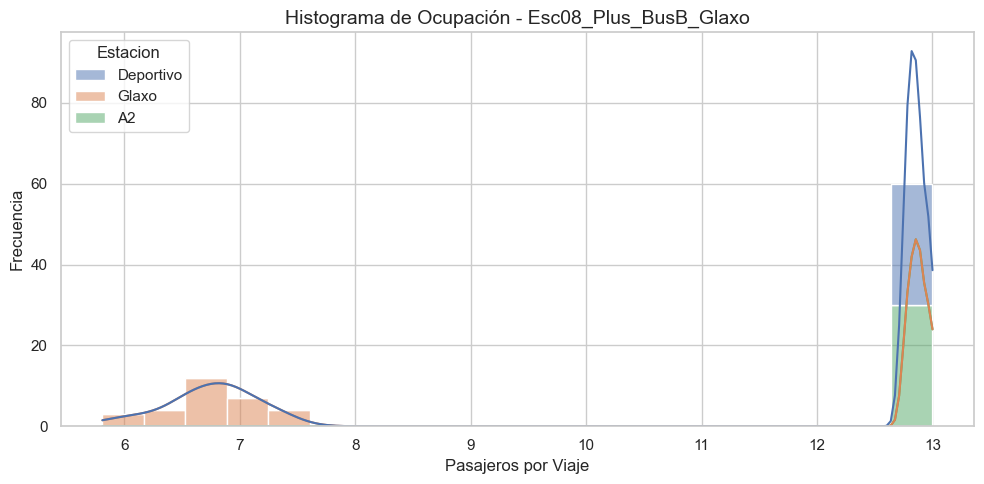

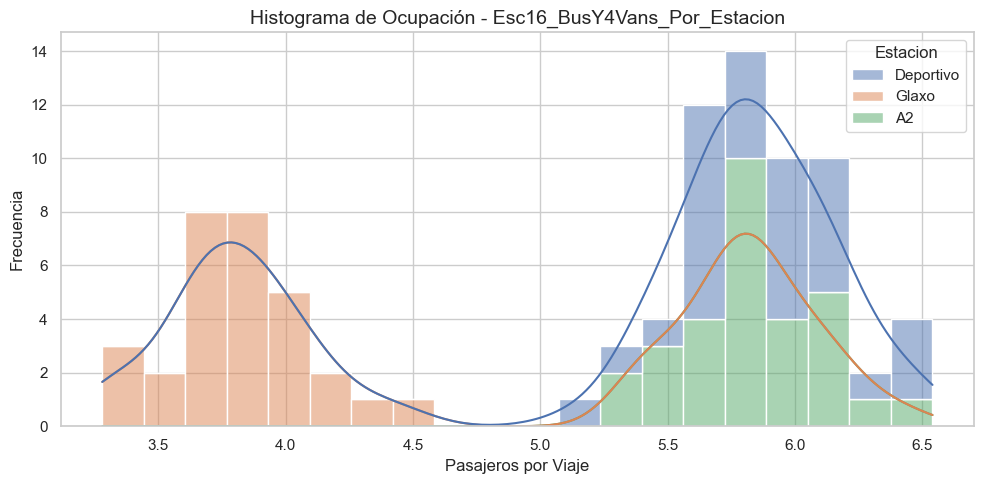

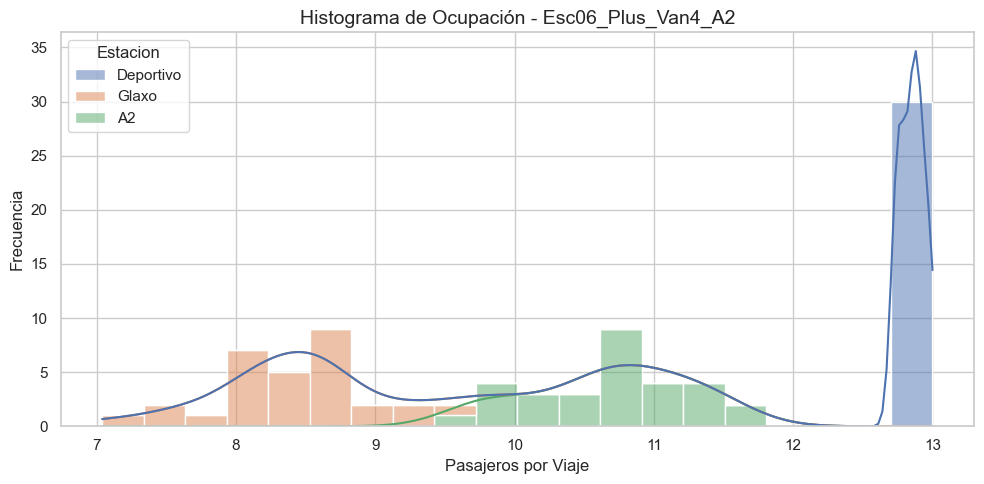

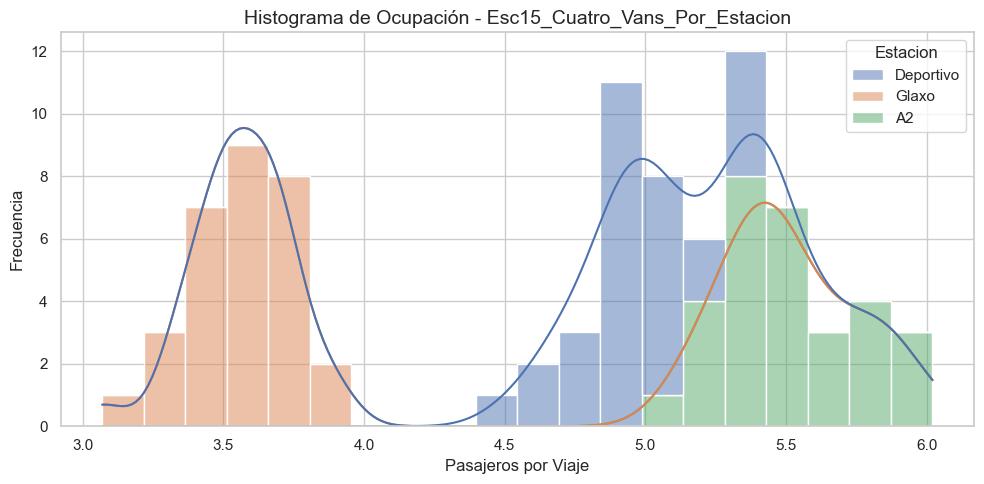

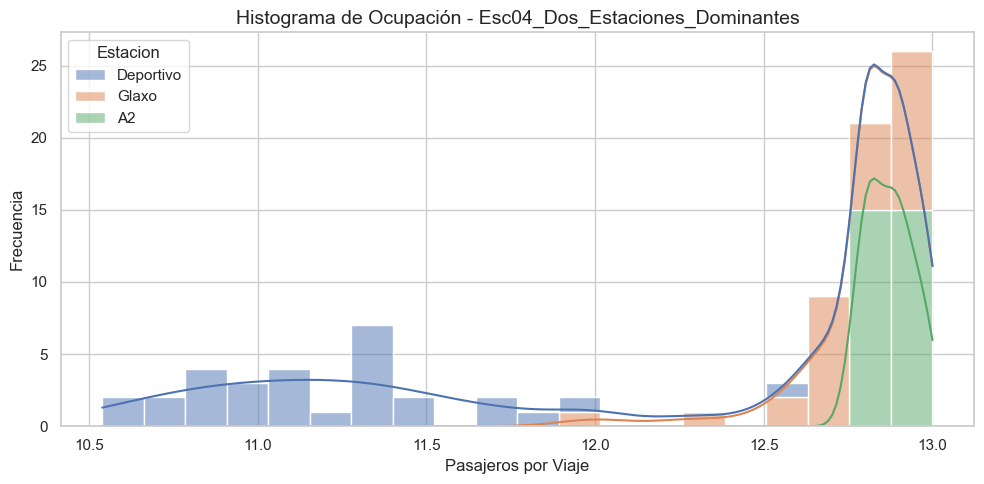

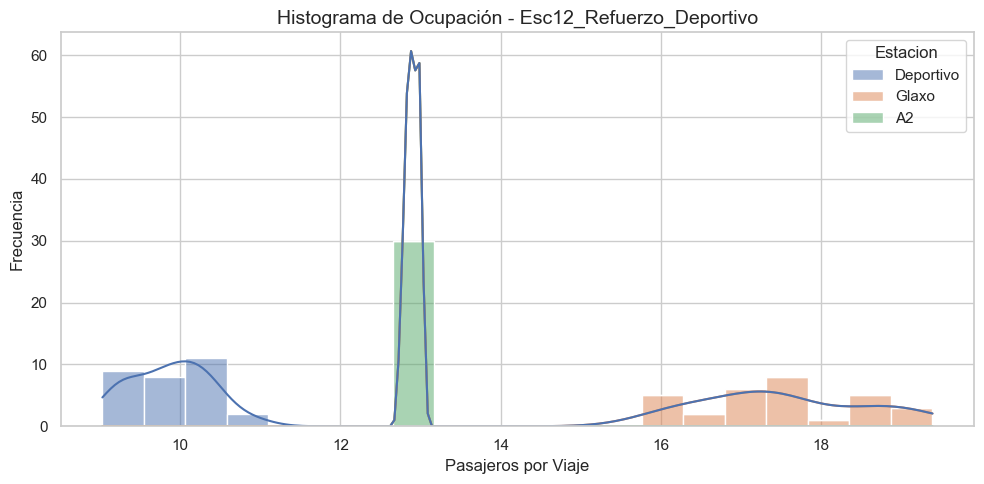

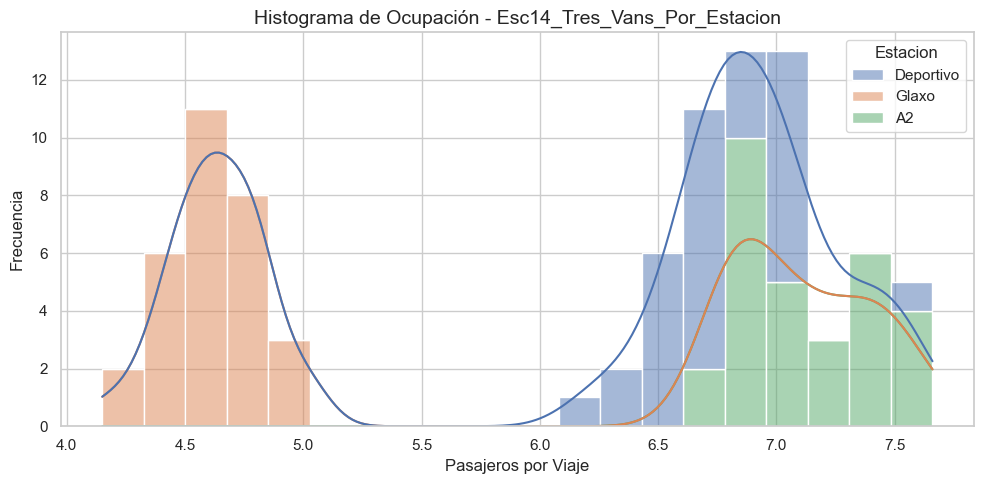

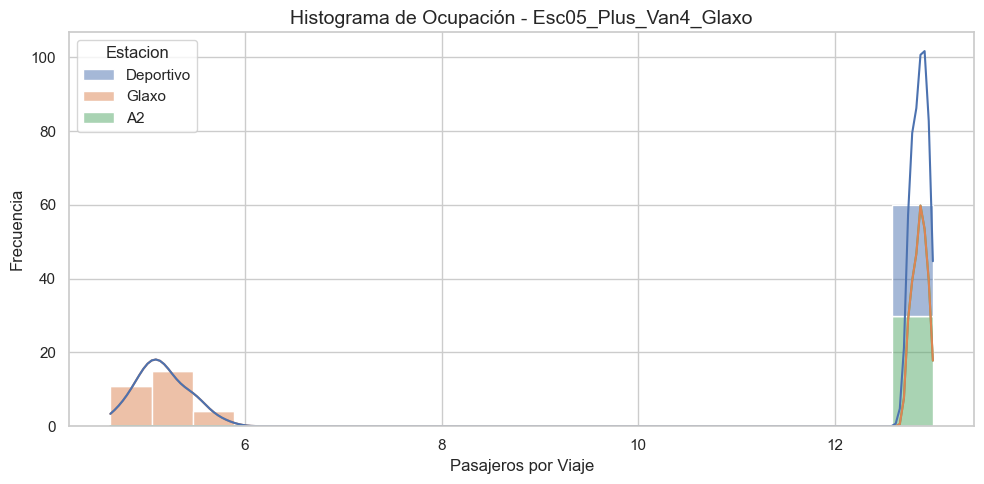

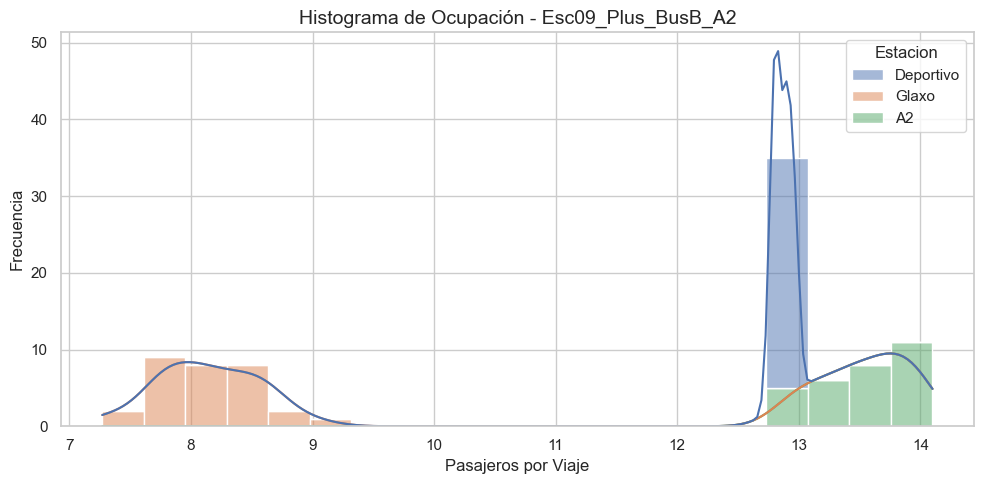

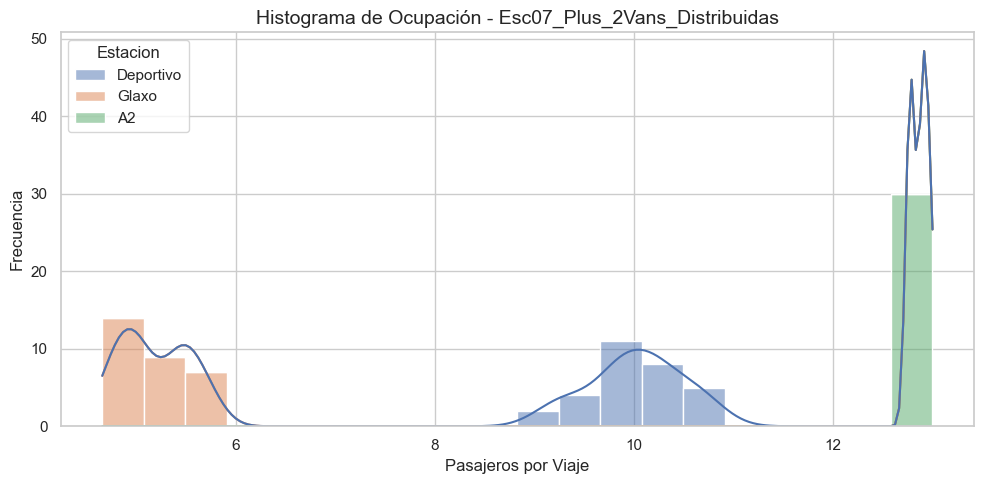

In [39]:

carpeta = "."  
archivos = [f for f in os.listdir(carpeta) if f.startswith("Esc") and f.endswith(".xlsx")]

# ===============================
# CARGA de datos desde cada archivo
# ===============================
df_ocupacion_total = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo.replace(".xlsx", "")
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# ===============================
# HISTOGRAMAS por ESCENARIO
# ===============================
escenarios_unicos = df_ocupacion_total["Escenario"].unique()

for escenario in escenarios_unicos:
    df_esc = df_ocupacion_total[df_ocupacion_total["Escenario"] == escenario]
    
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_esc, x="Pasajeros_Transportados_Promedio", hue="Estacion",
                 bins=20, kde=True, multiple="stack")
    plt.title(f"Histograma de Ocupación - {escenario}")
    plt.xlabel("Pasajeros por Viaje")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


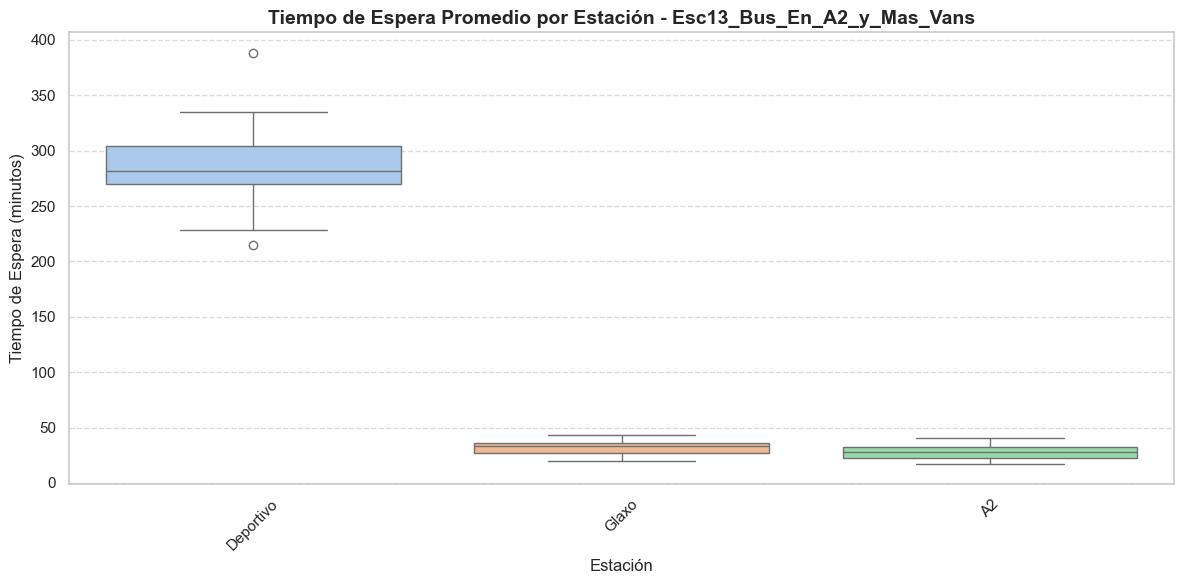

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


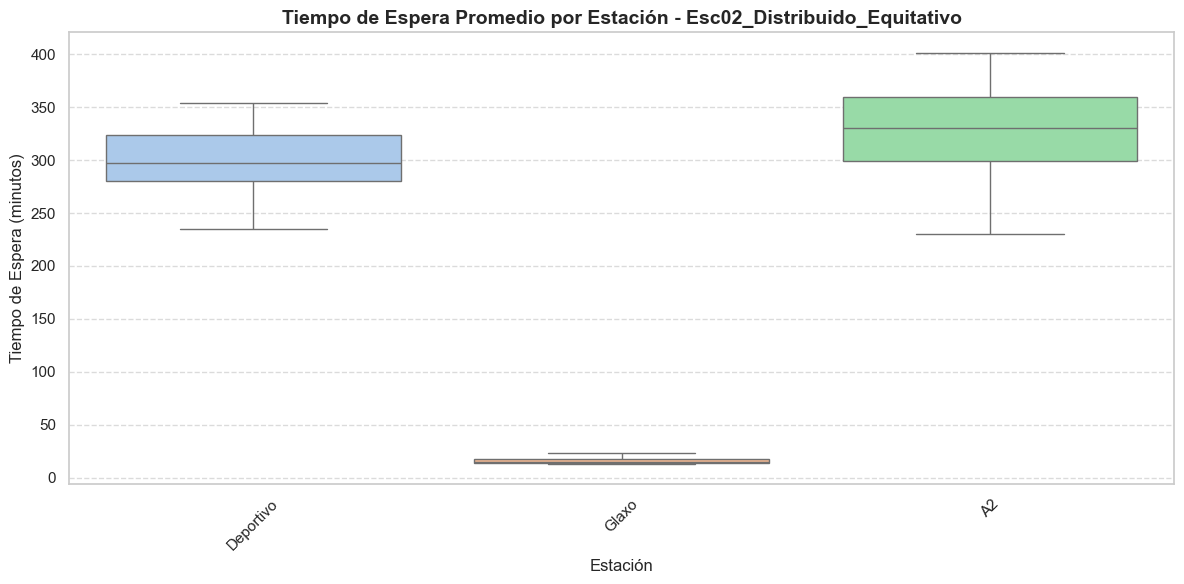

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


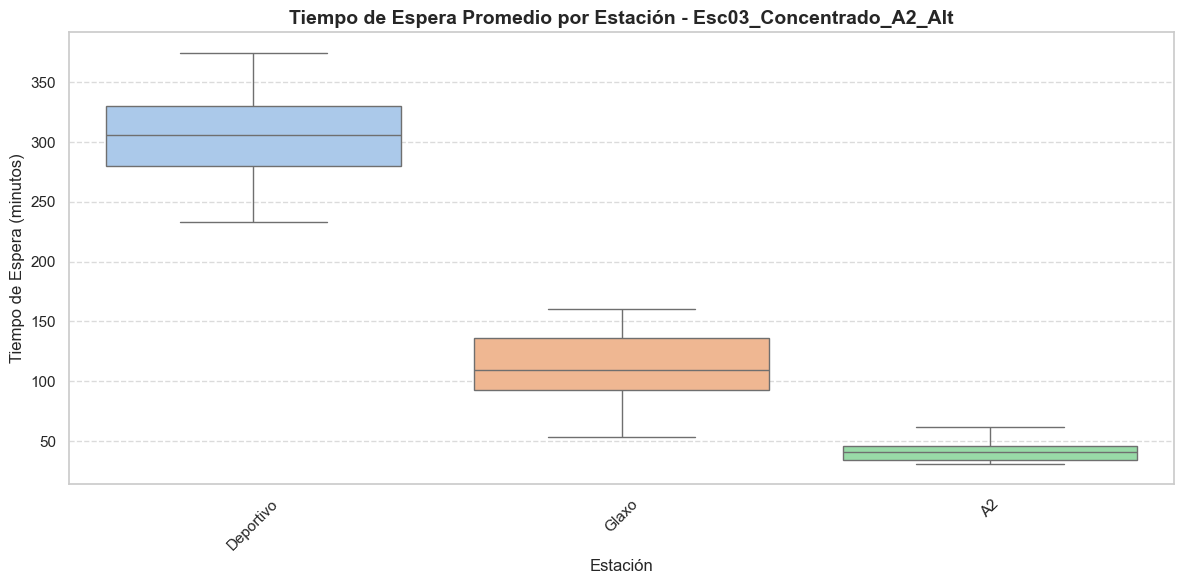

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


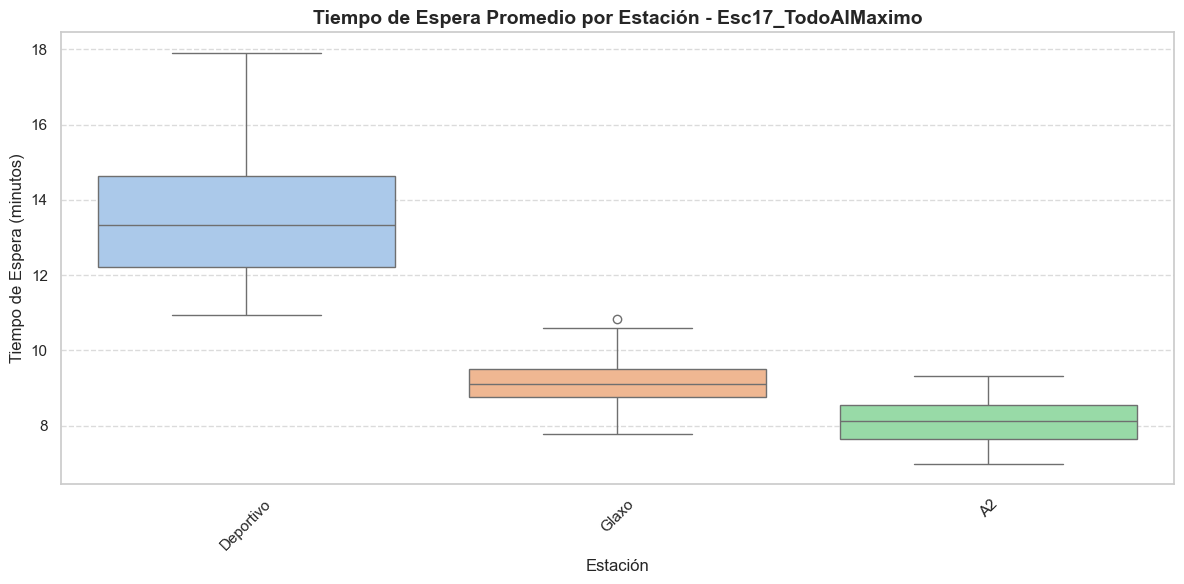

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


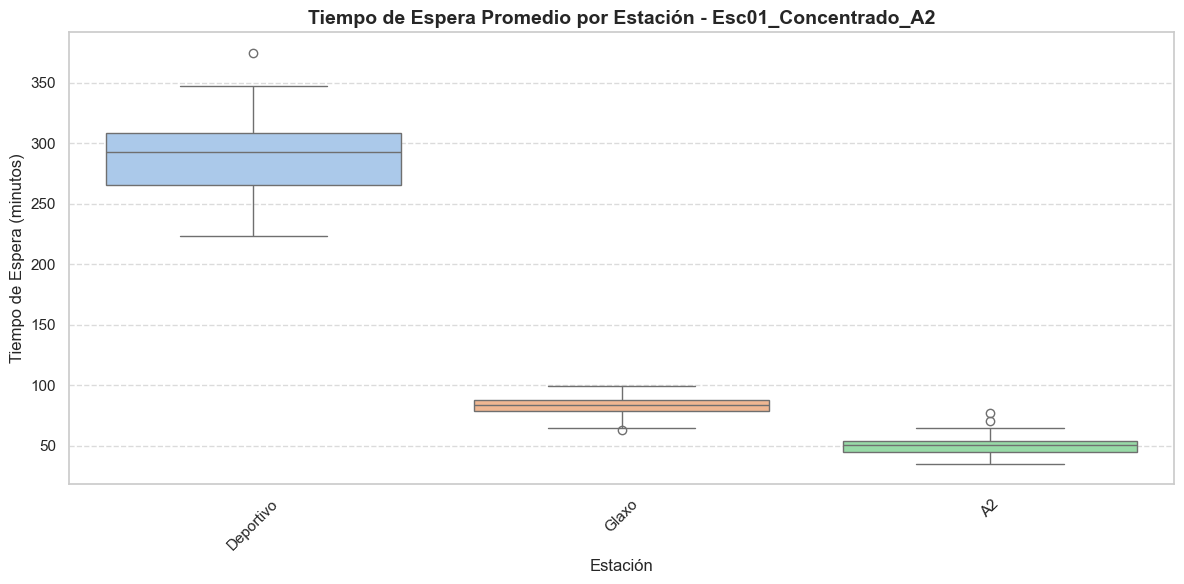

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


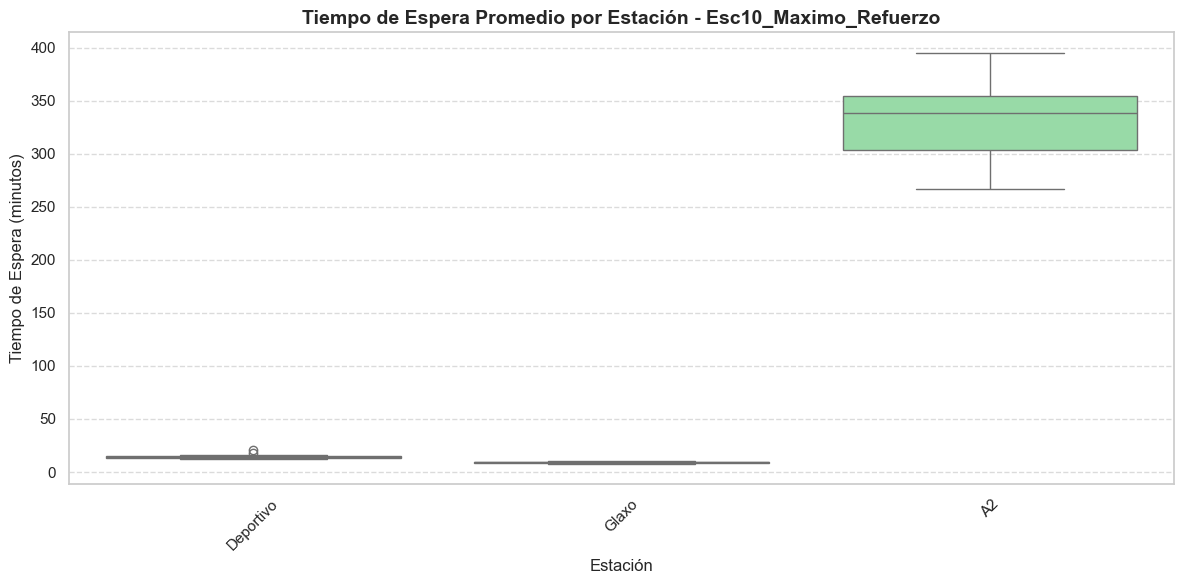

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


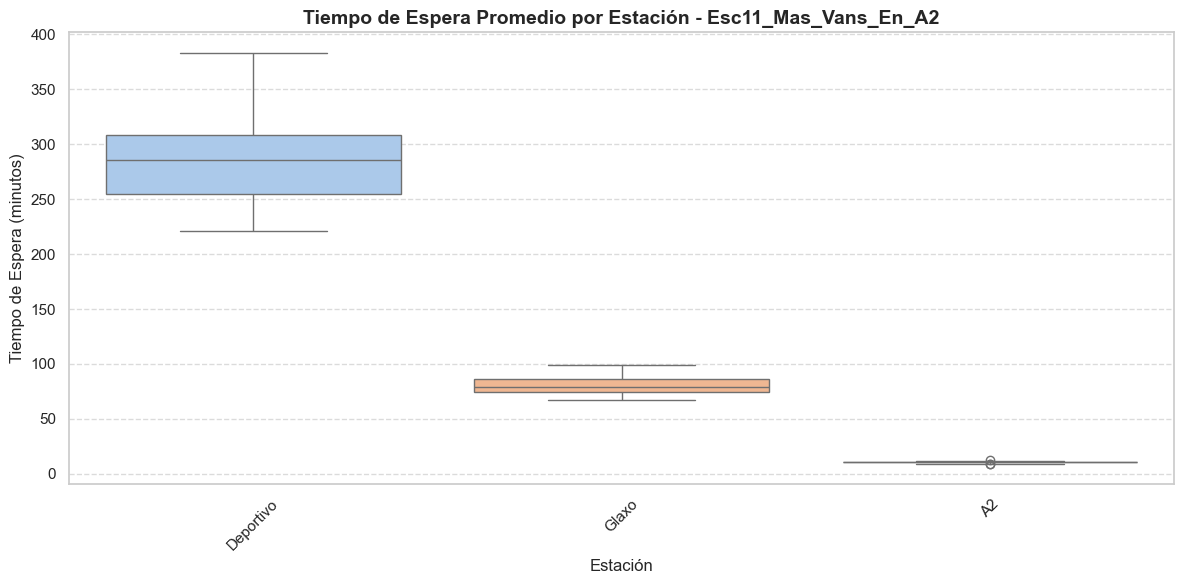

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


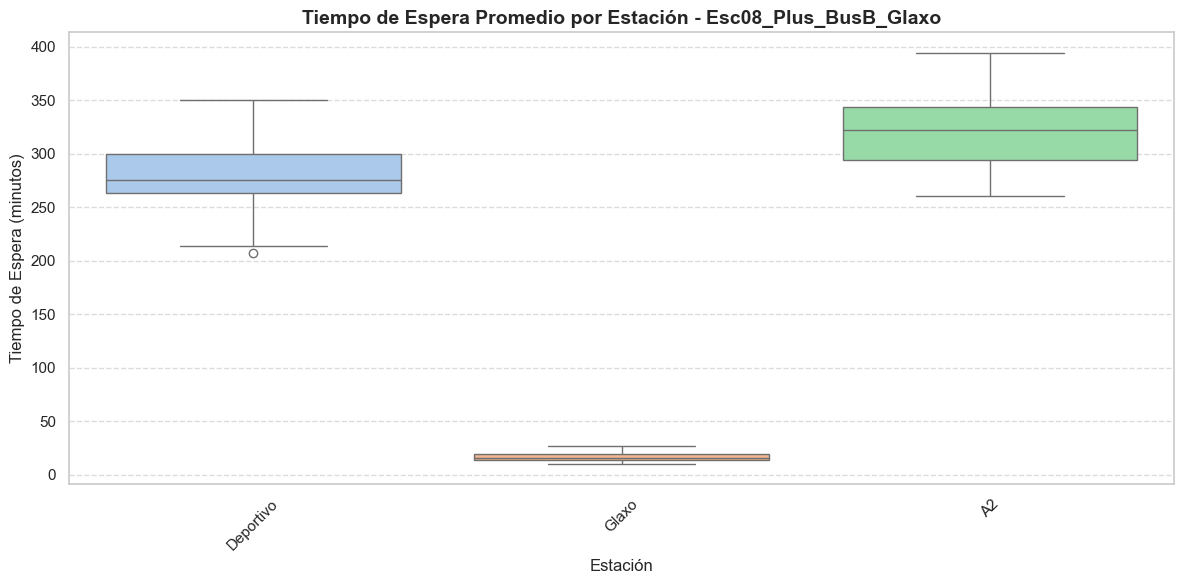

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


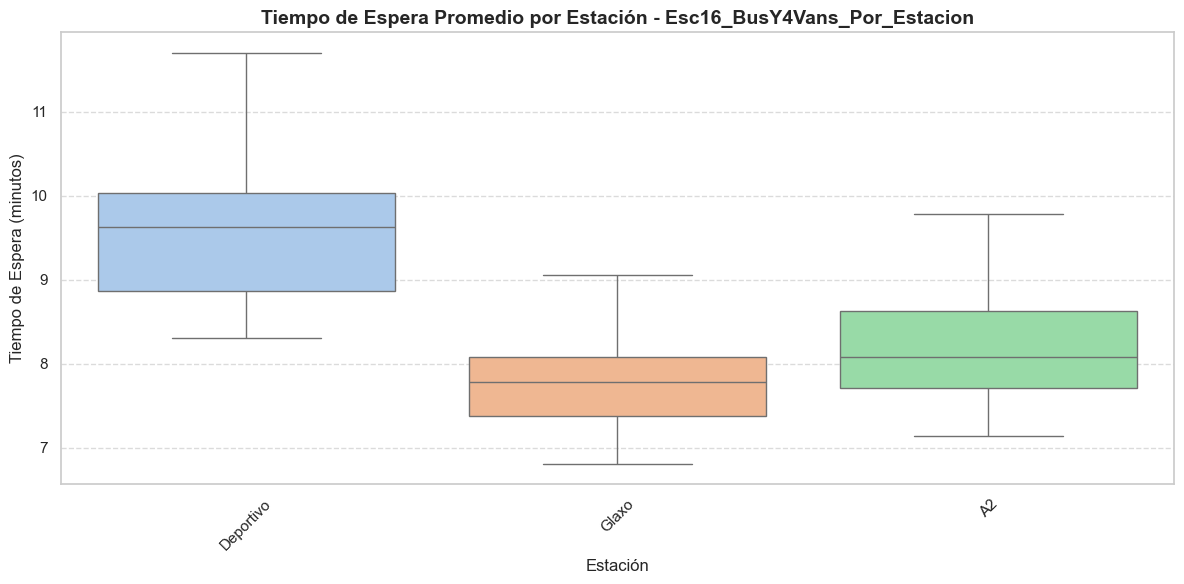

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


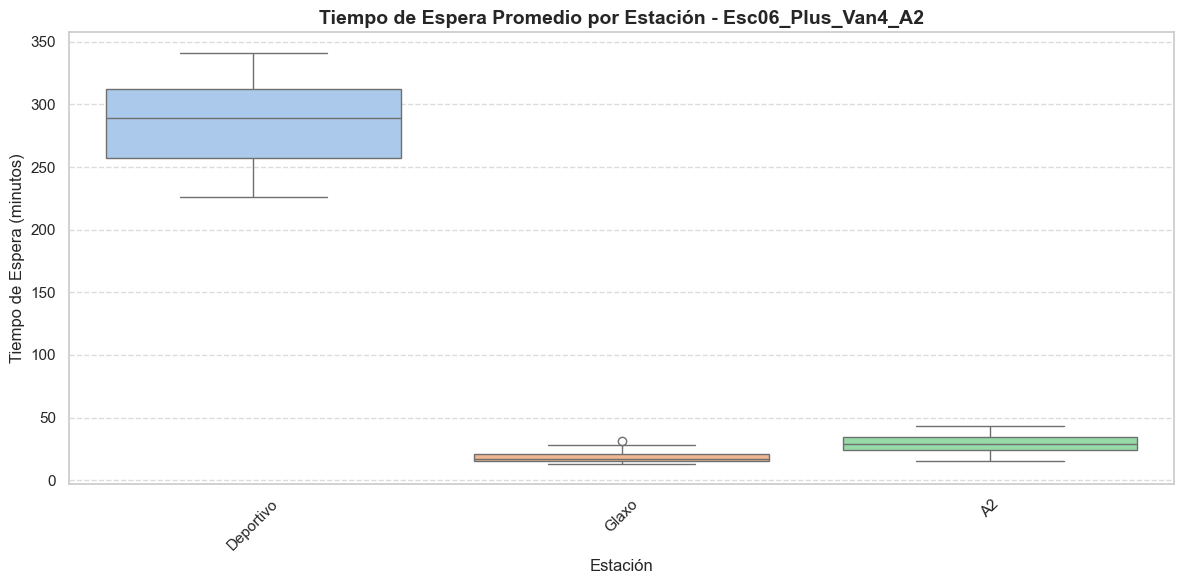

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


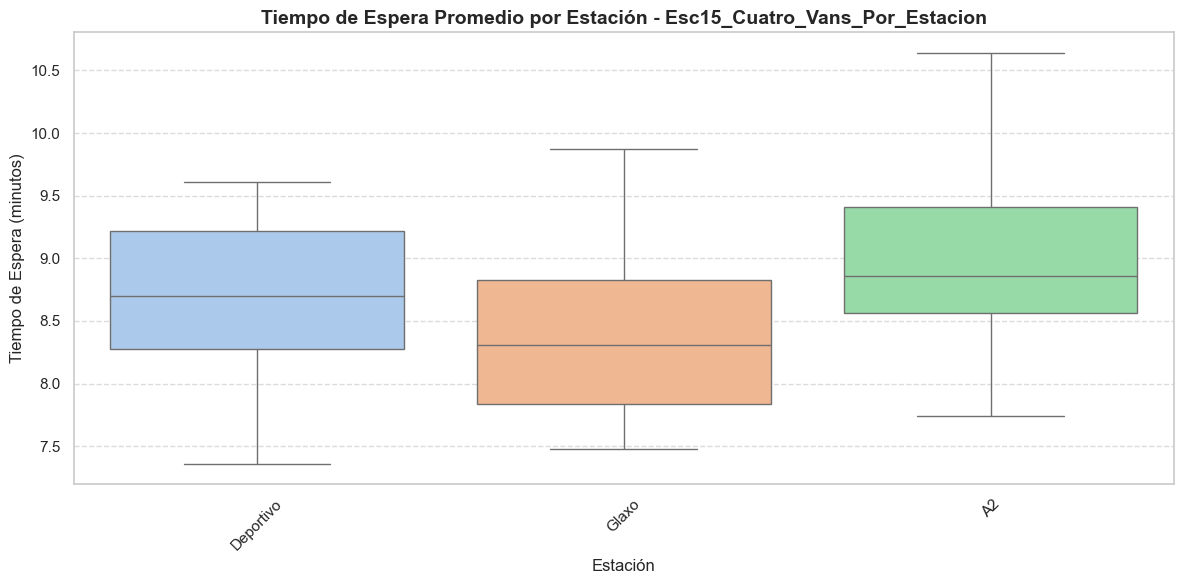

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


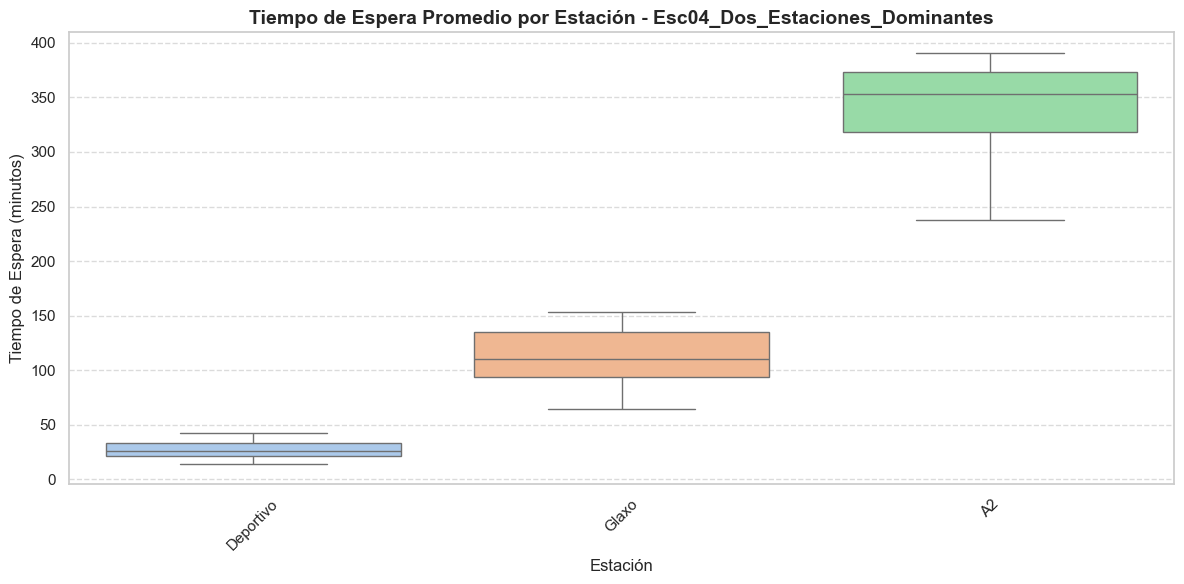

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


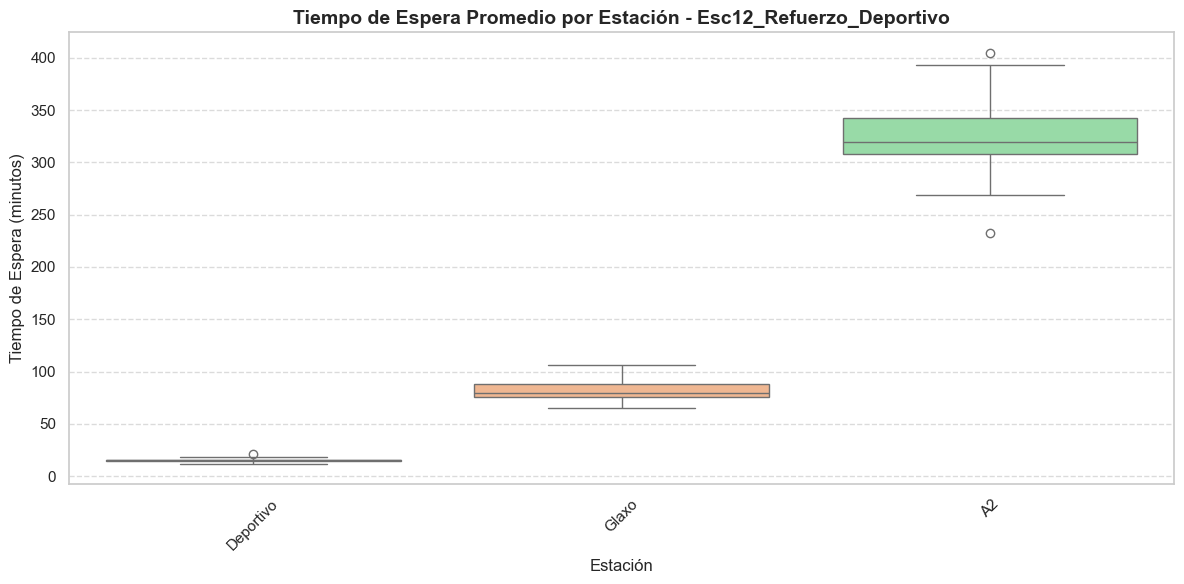

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


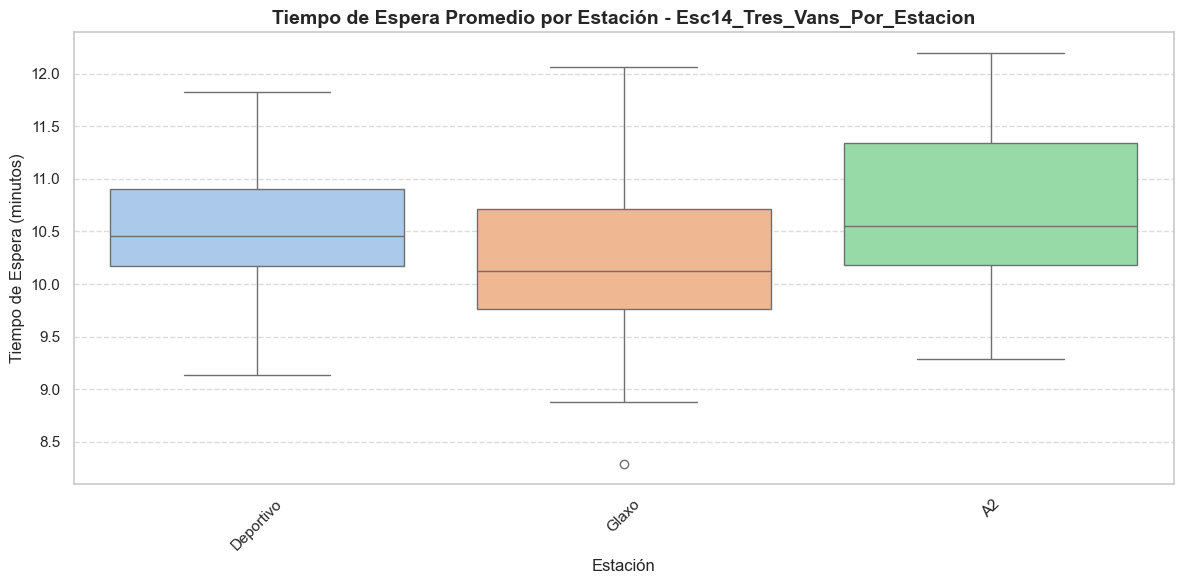

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


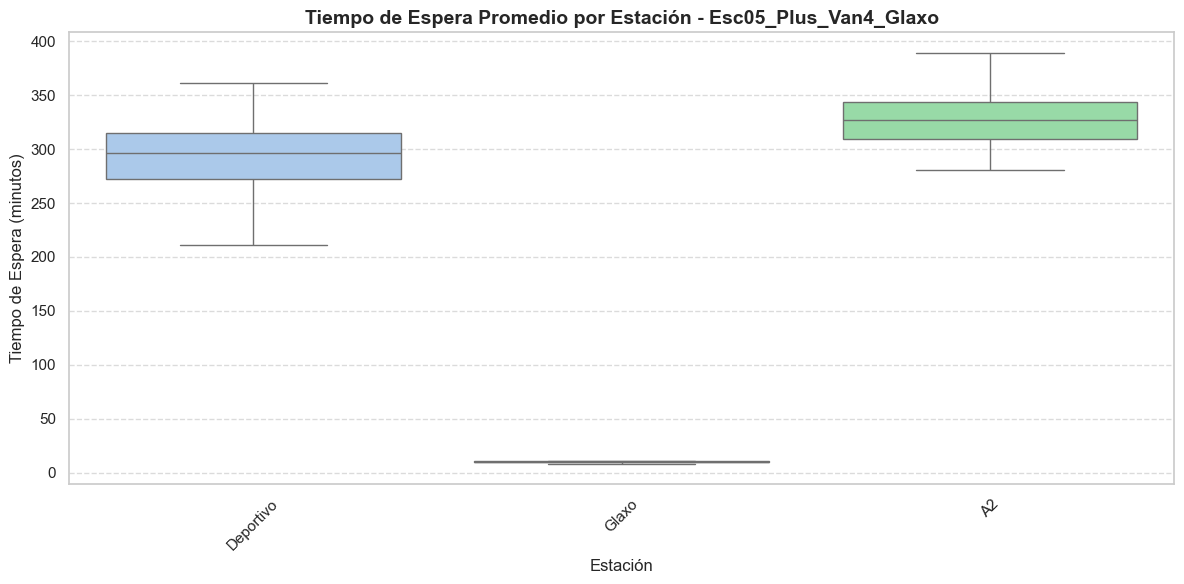

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


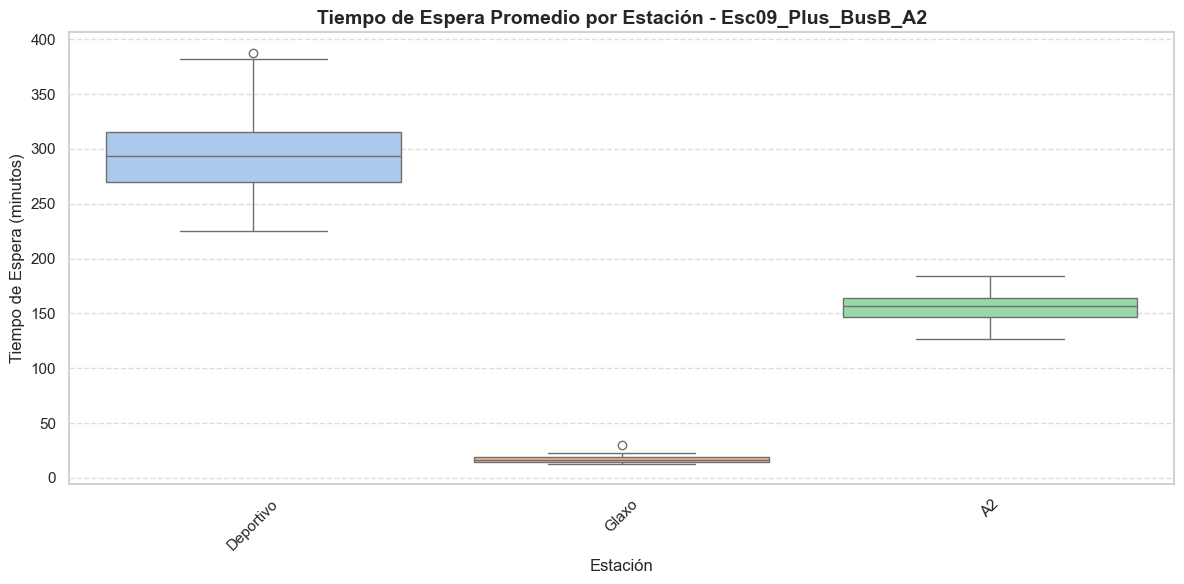

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/1398304513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


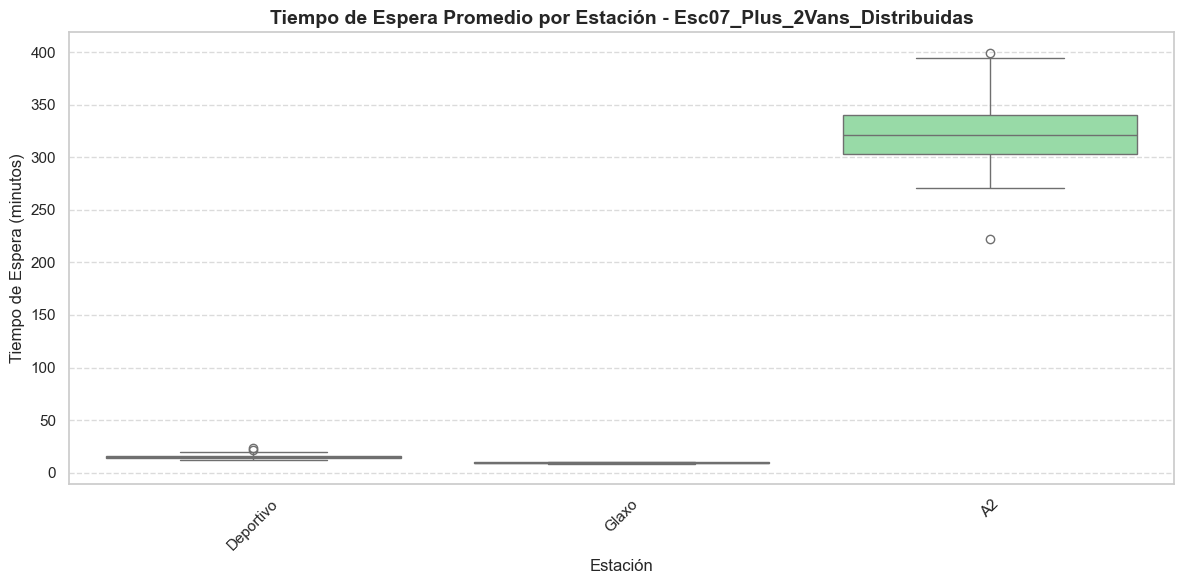

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

escenarios_unicos = df_total["Escenario"].unique()

for escenario in escenarios_unicos:
    df_esc = df_total[df_total["Escenario"] == escenario]

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_esc,
        x="Estacion",
        y="Tiempo_Espera_Promedio_min",
        palette="pastel"
    )
    plt.title(f"Tiempo de Espera Promedio por Estación - {escenario}", fontsize=14, weight='bold')
    plt.xlabel("Estación")
    plt.ylabel("Tiempo de Espera (minutos)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


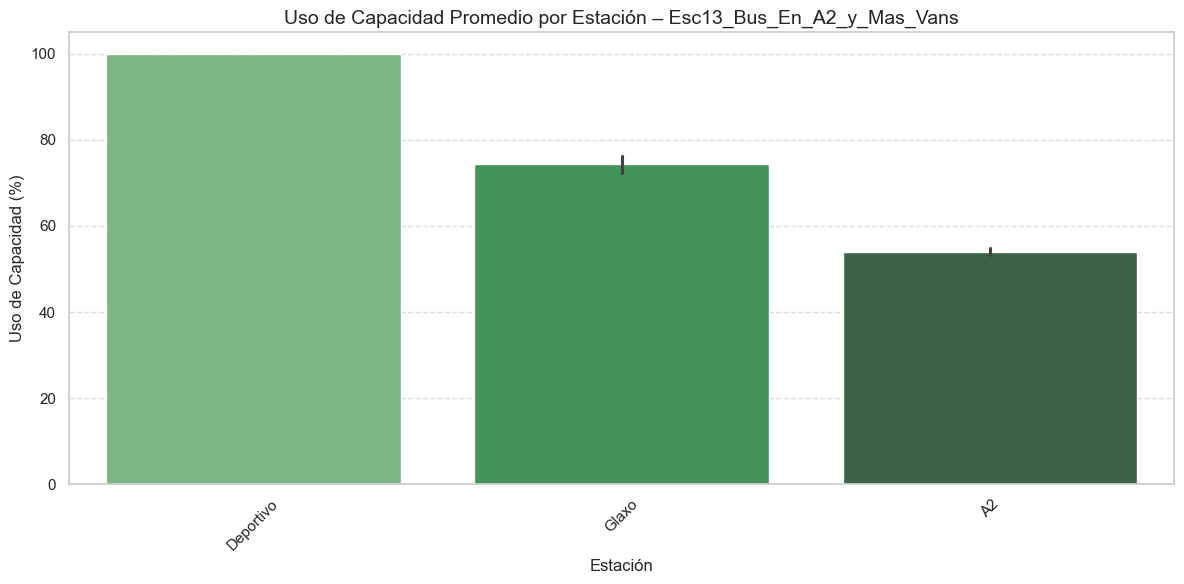

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


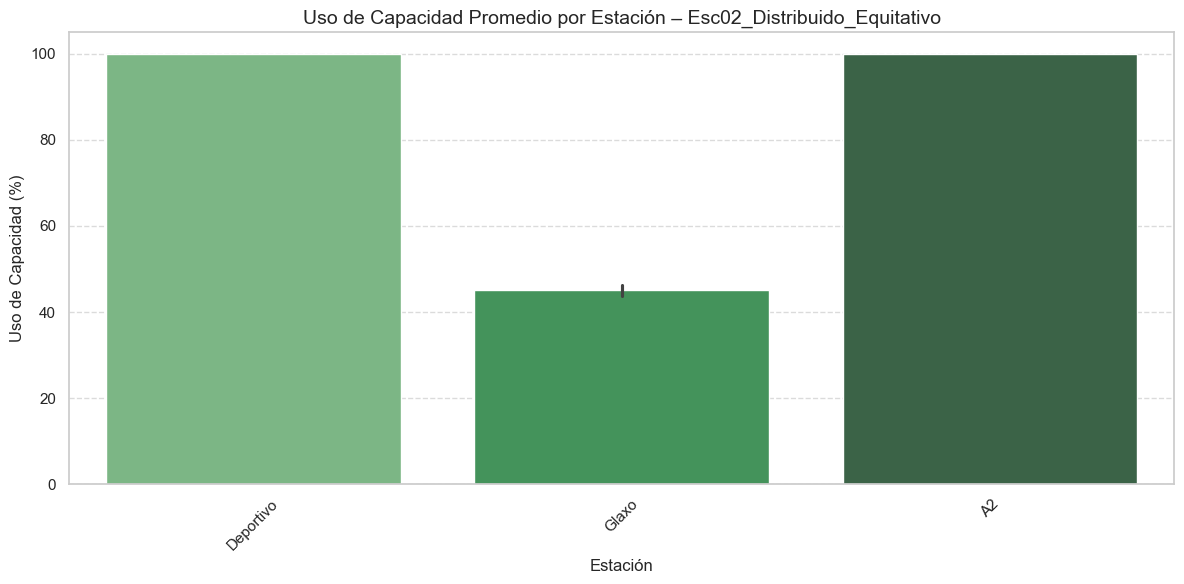

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


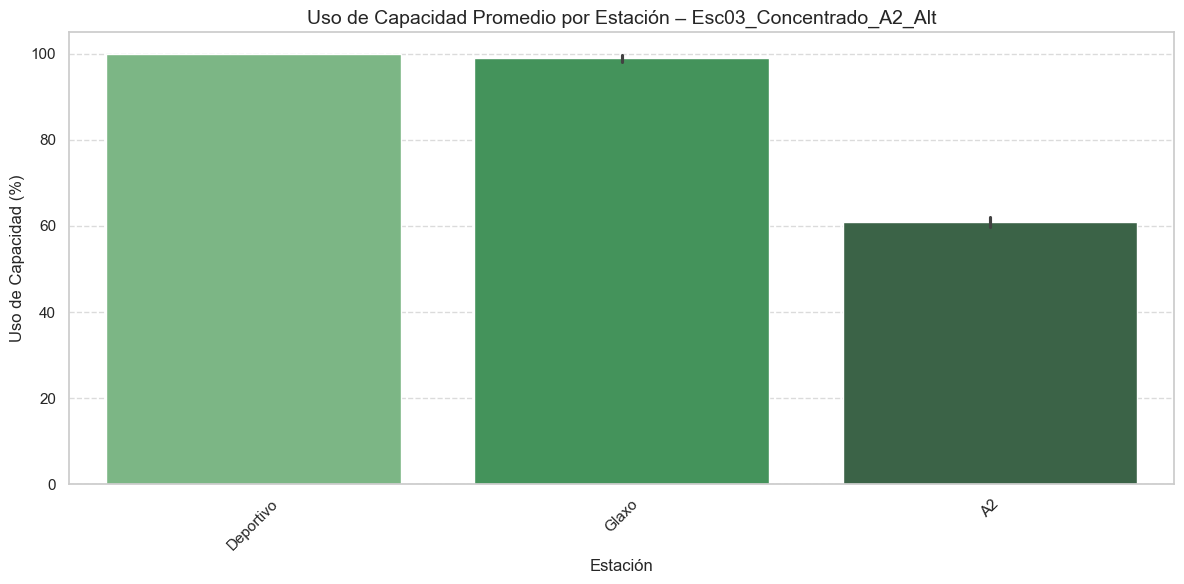

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


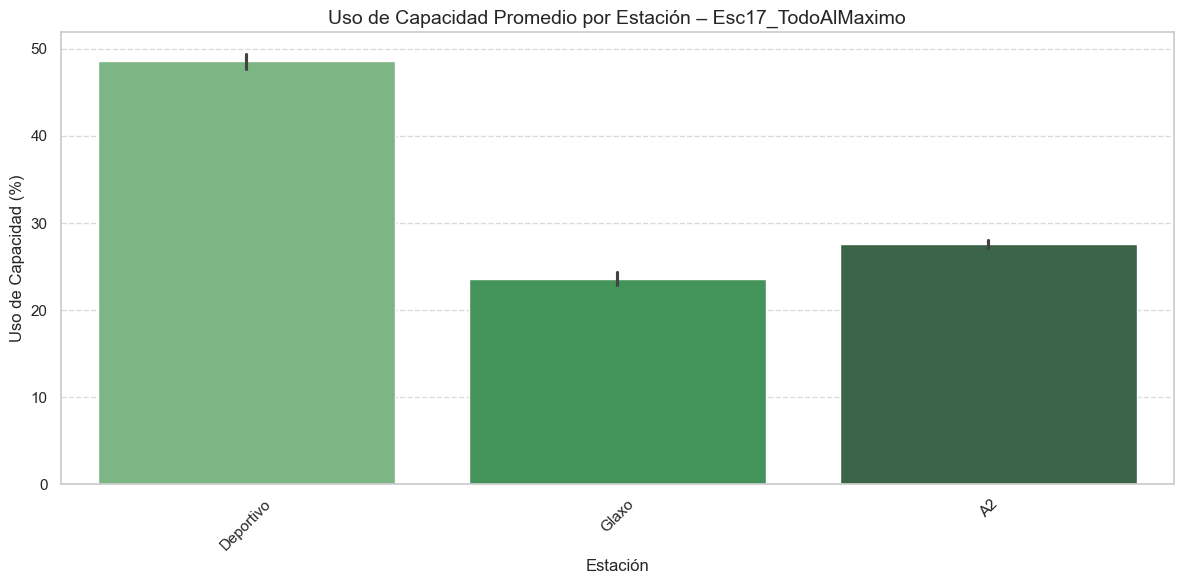

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


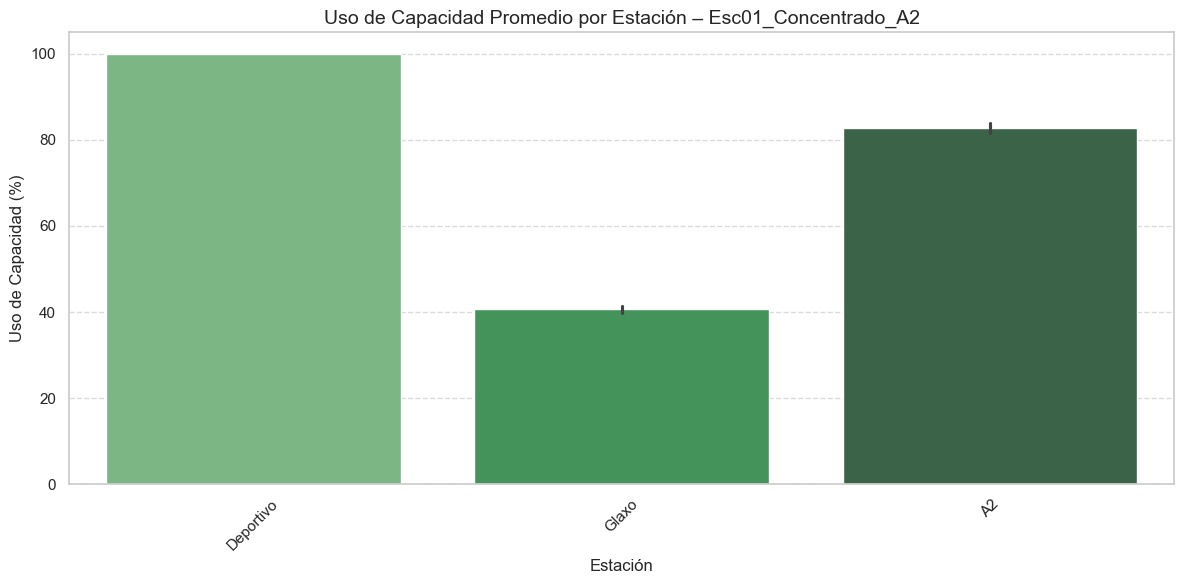

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


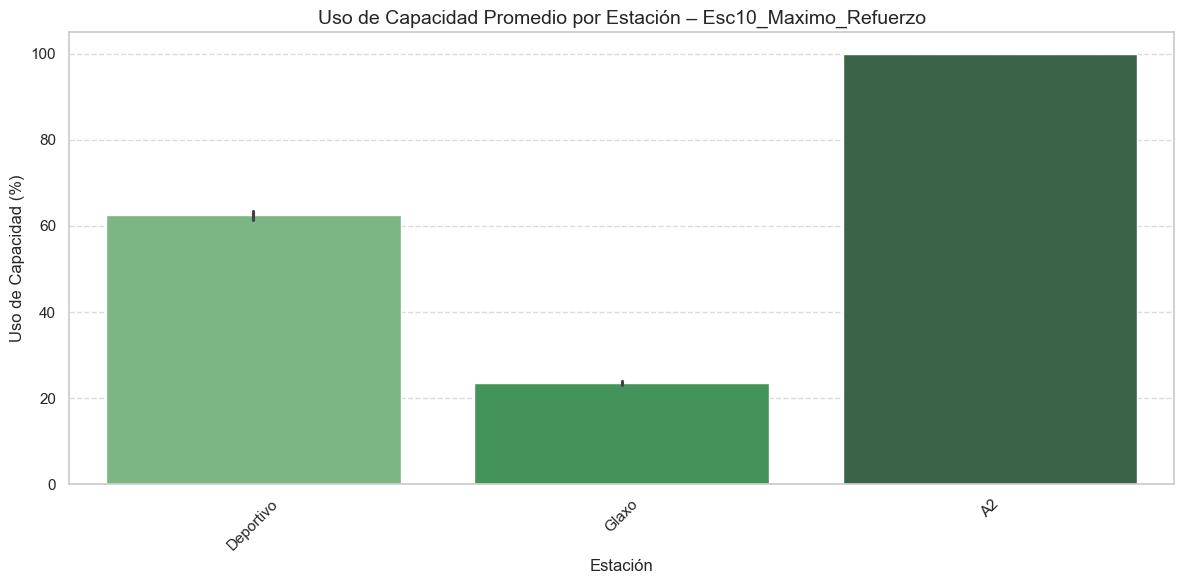

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


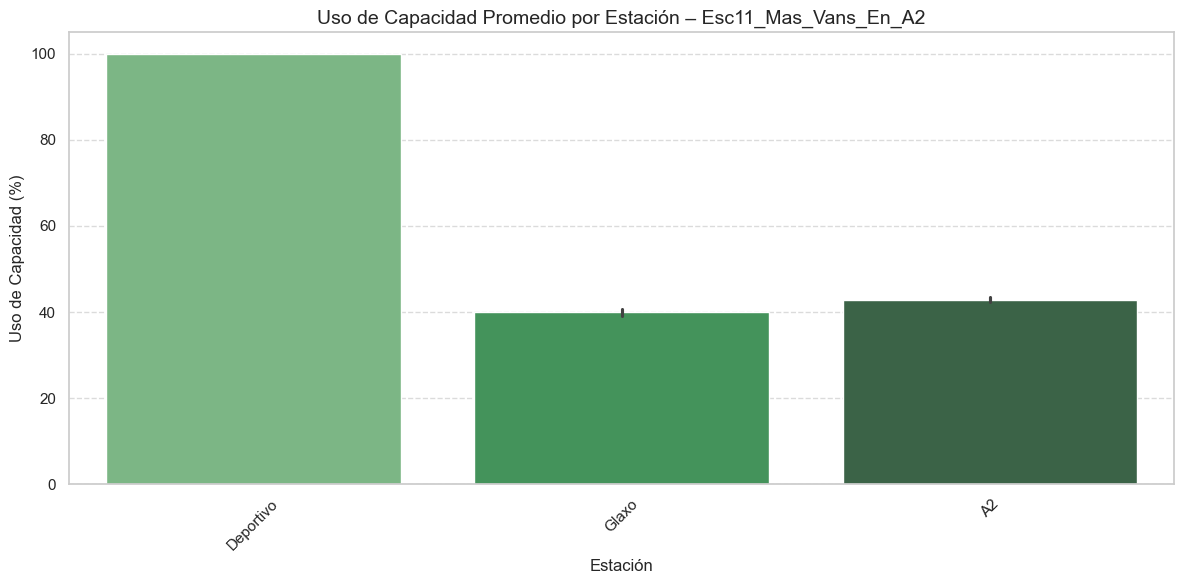

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


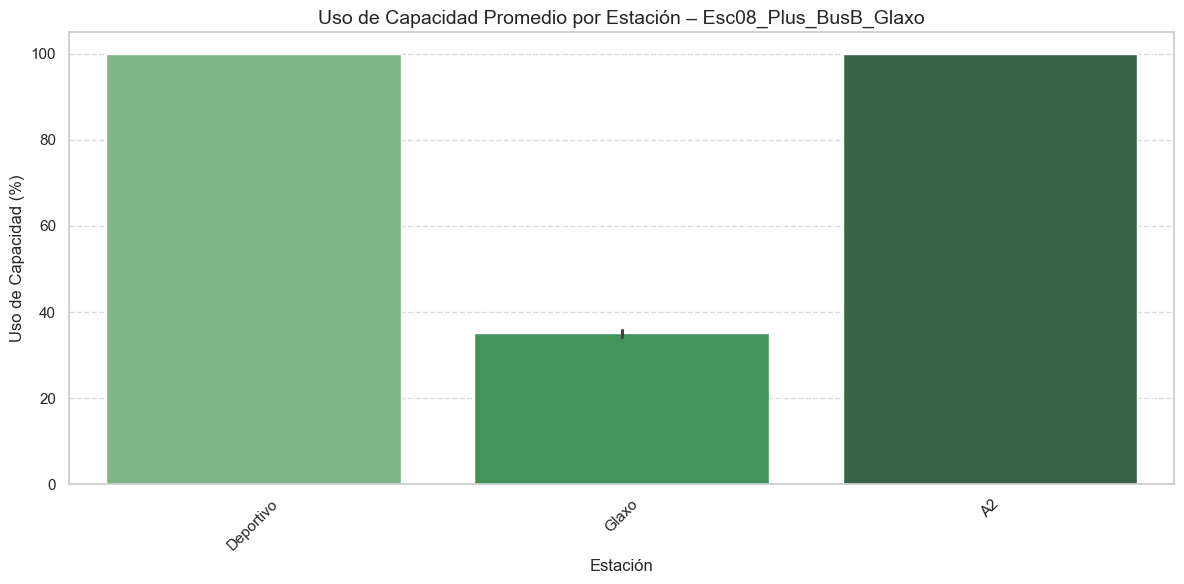

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


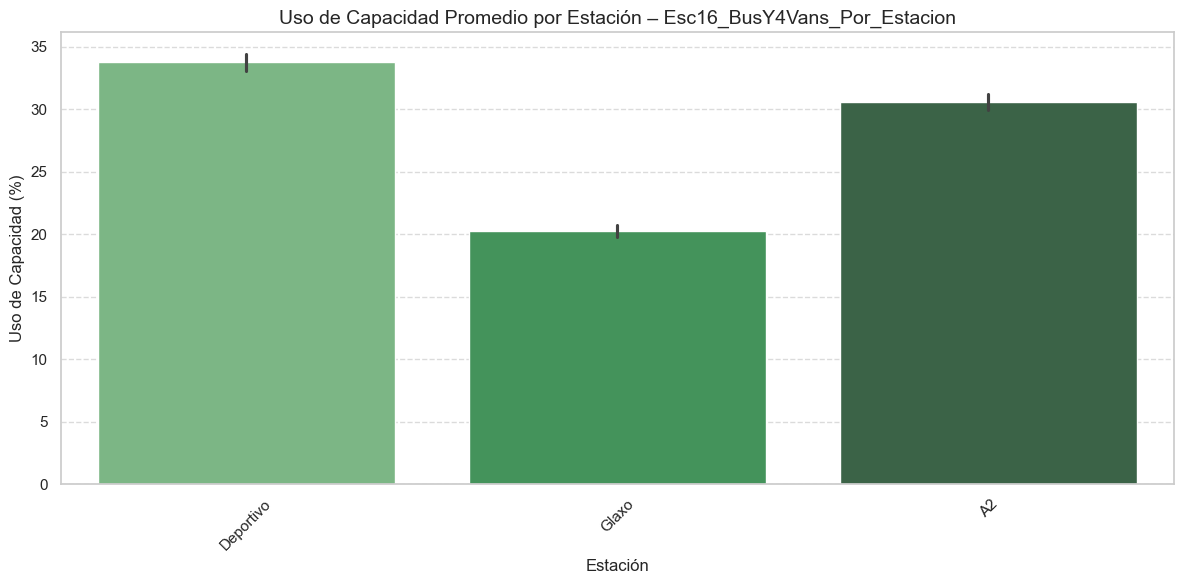

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


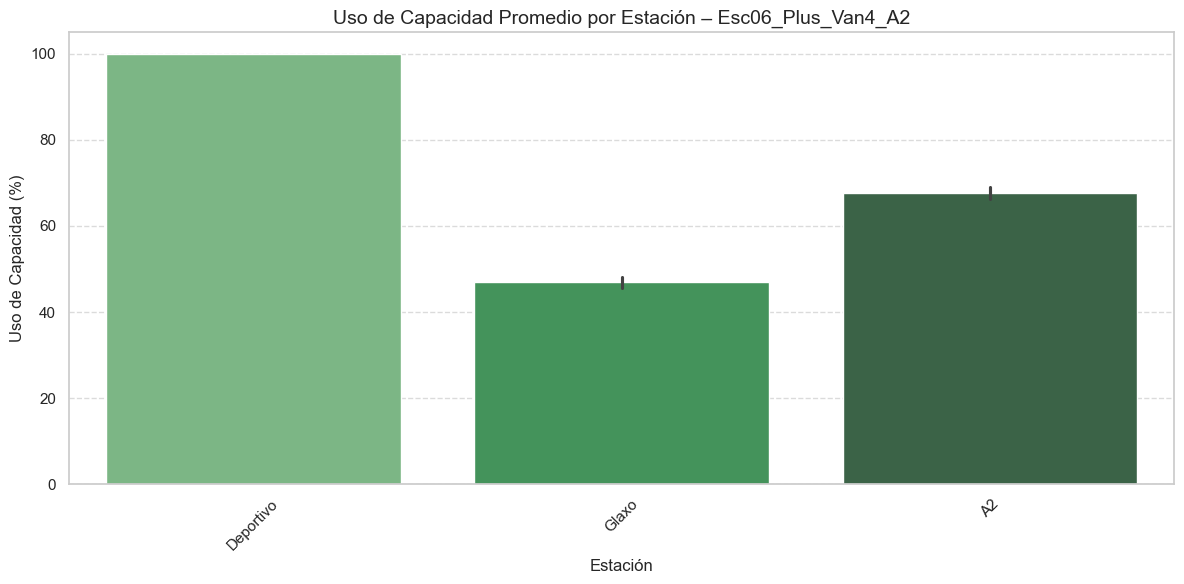

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


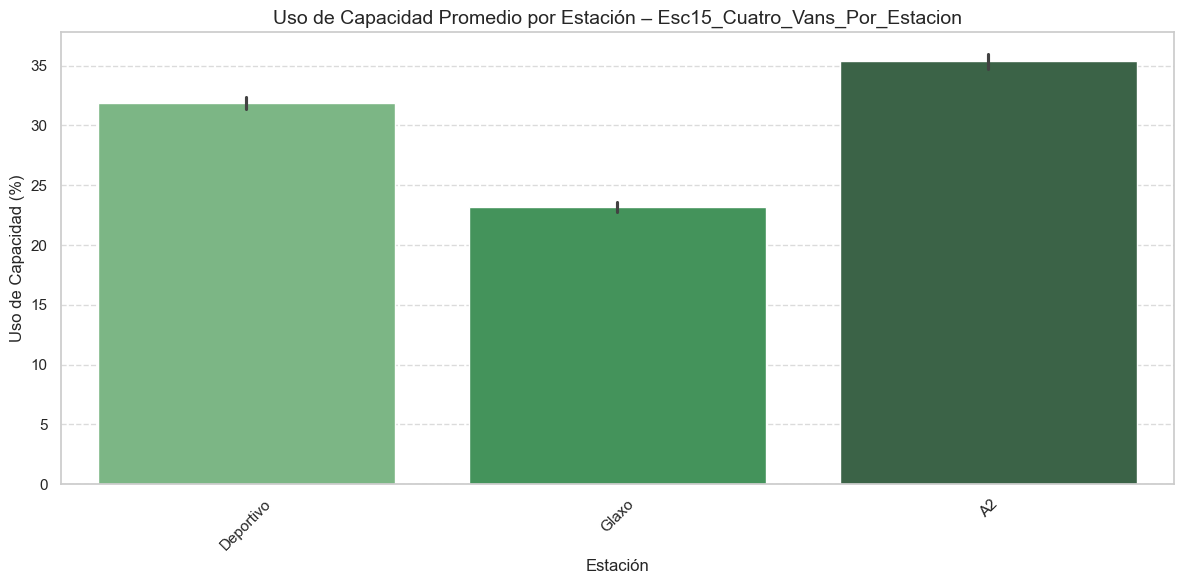

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


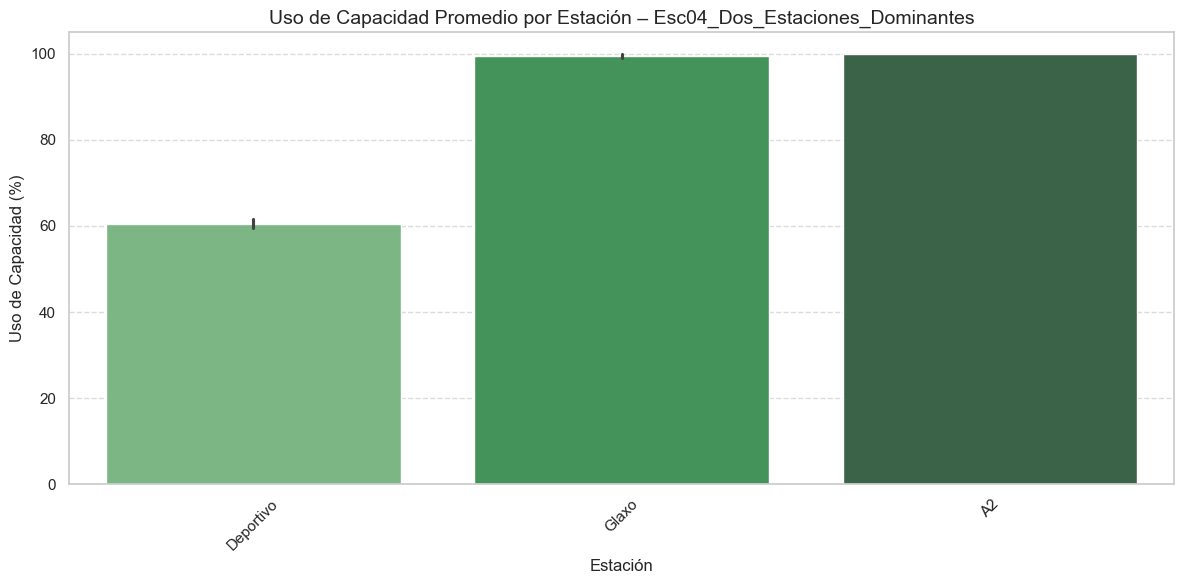

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


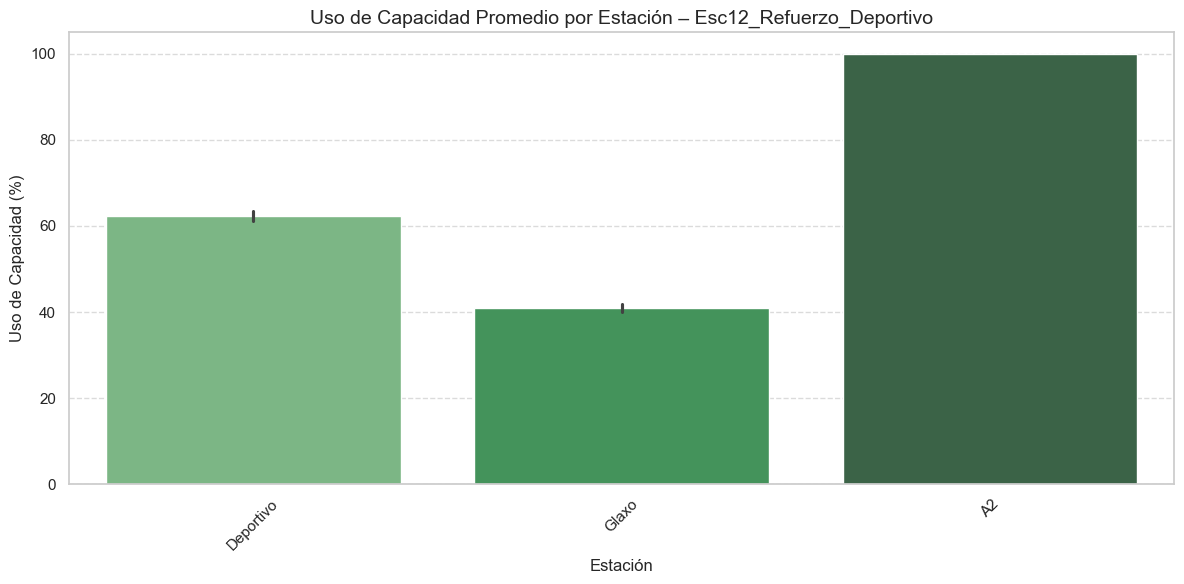

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


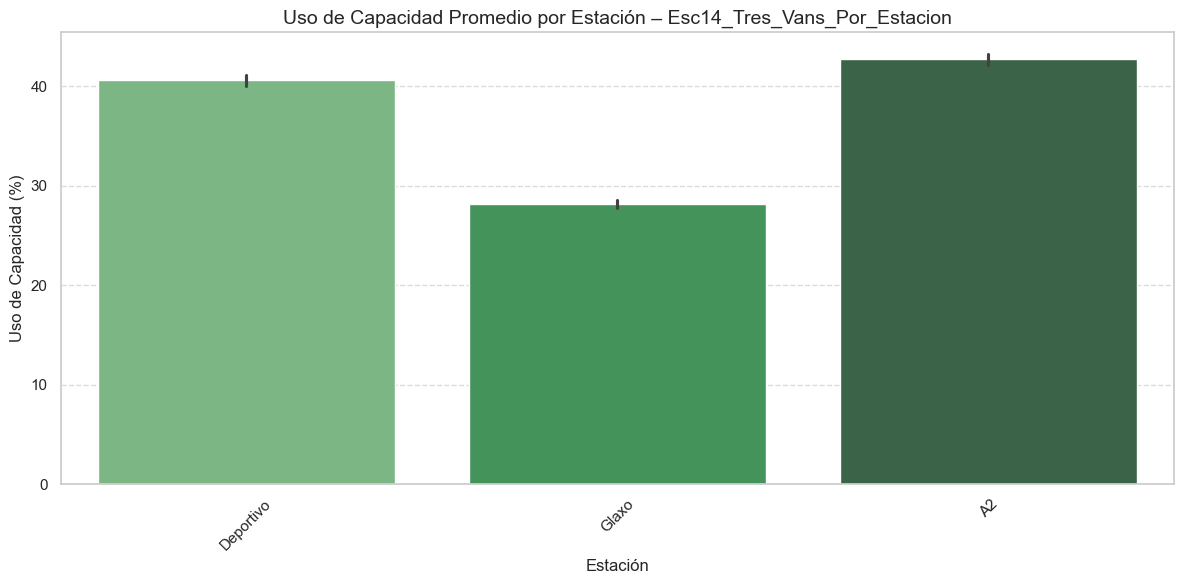

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


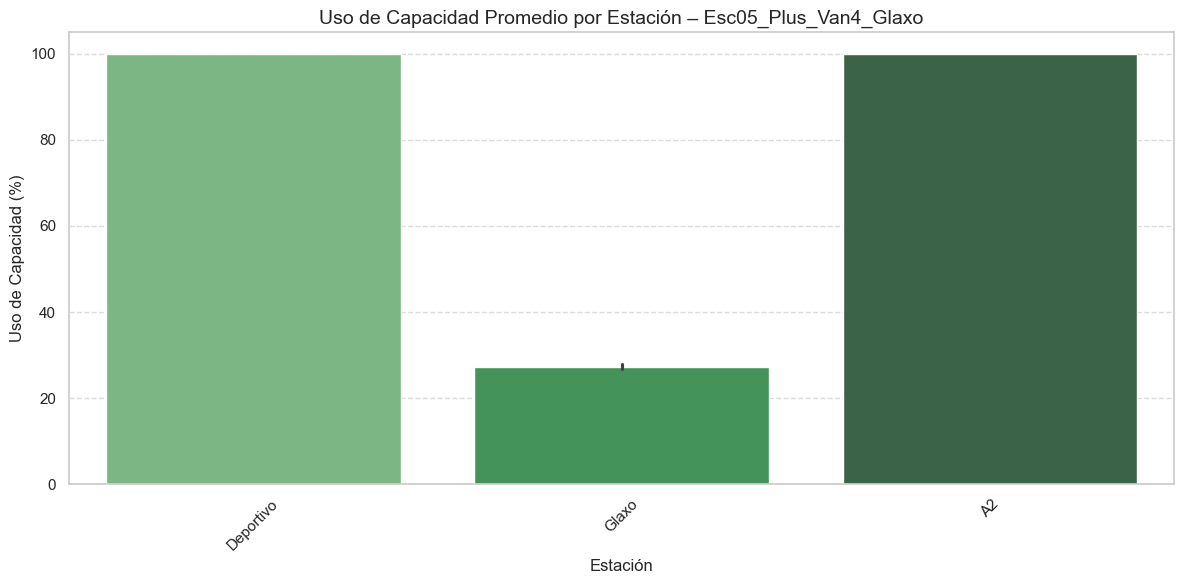

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


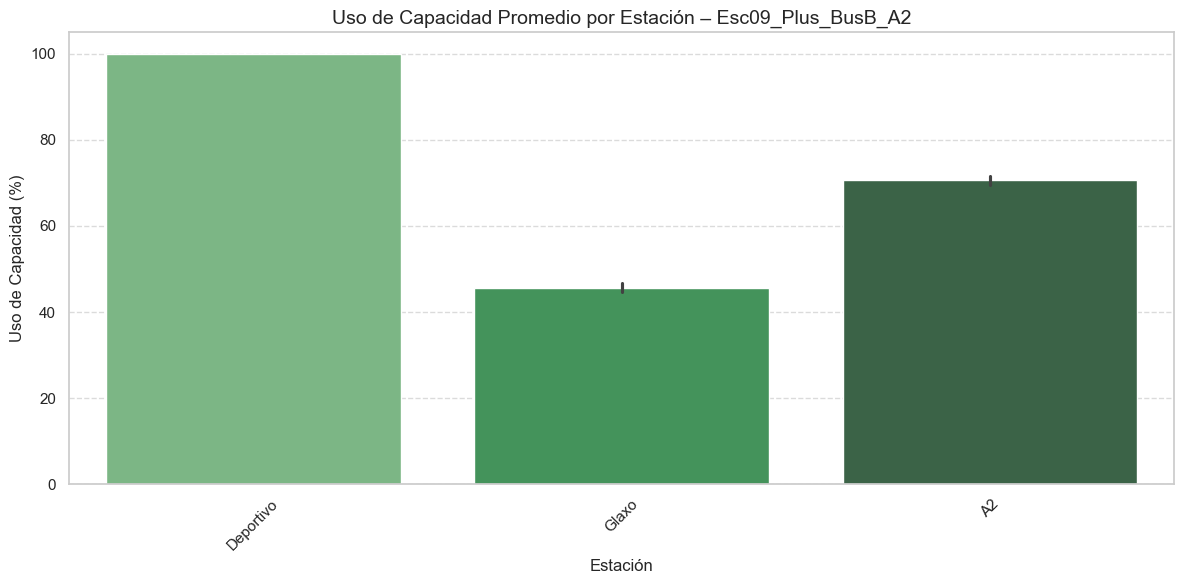

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2173074210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


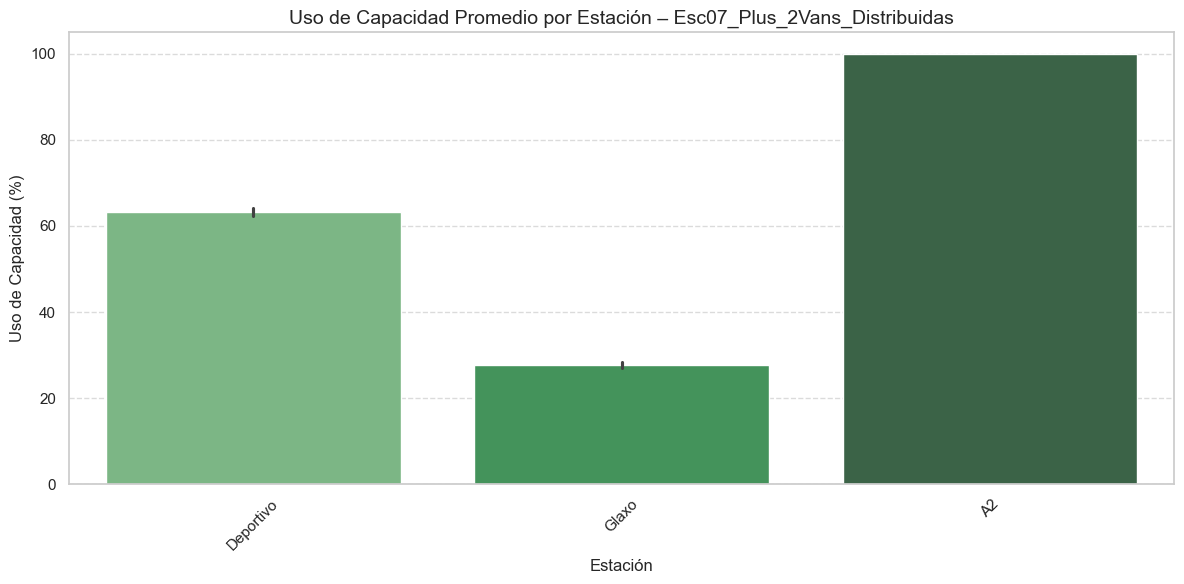

In [41]:
for escenario in escenarios_unicos:
    df_esc = df_total[df_total["Escenario"] == escenario]

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_esc,
        x="Estacion",
        y="Uso_Capacidad_Promedio_pct",
        palette="Greens_d"
    )
    plt.title(f"Uso de Capacidad Promedio por Estación – {escenario}", fontsize=14)
    plt.xlabel("Estación")
    plt.ylabel("Uso de Capacidad (%)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


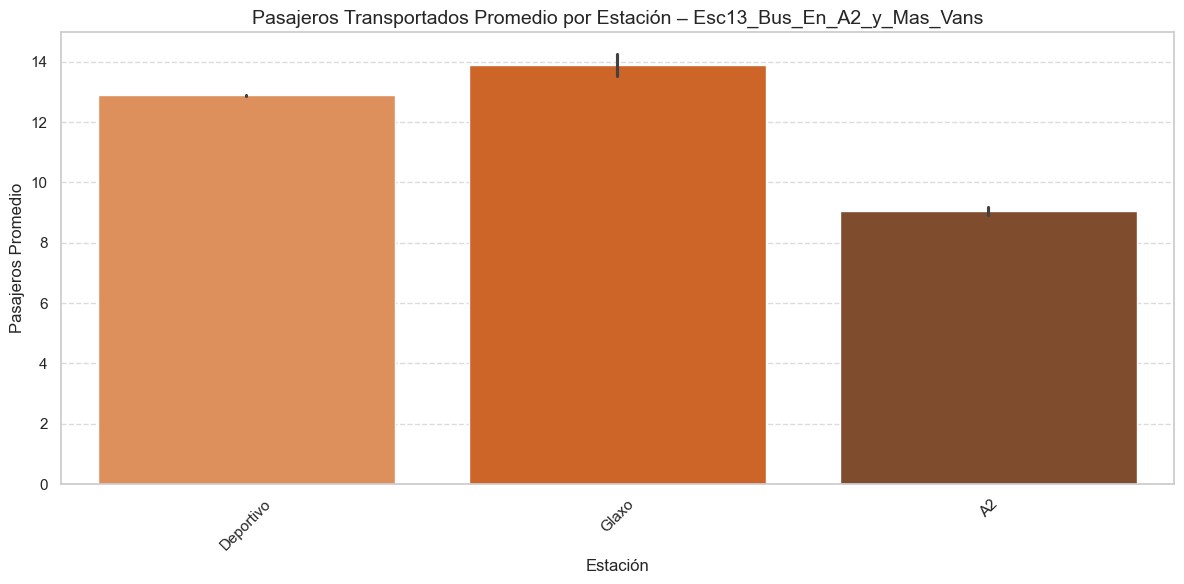

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


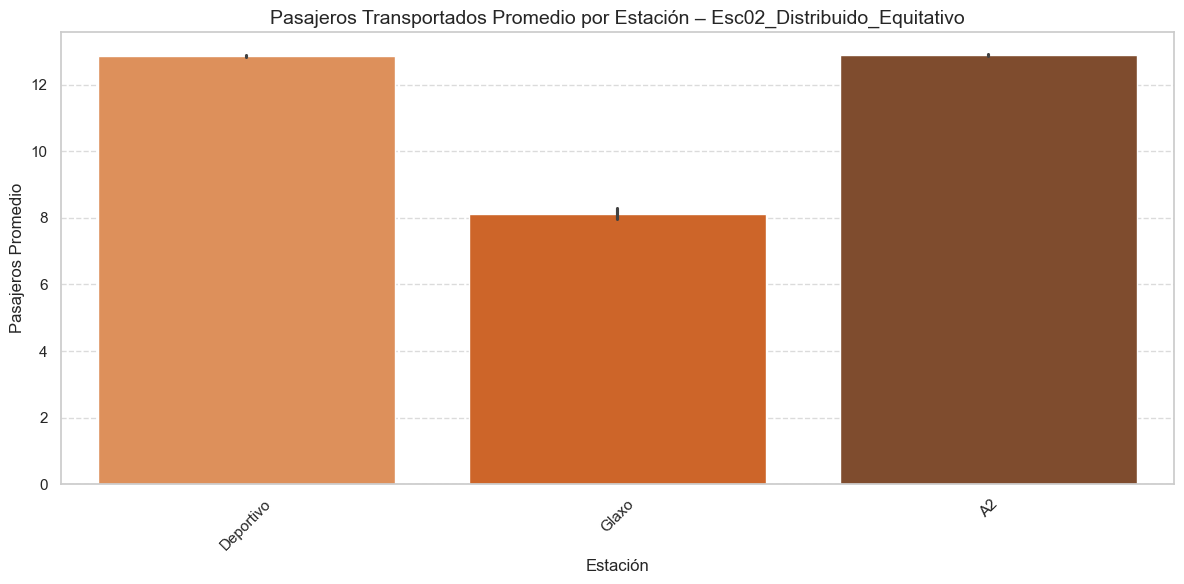

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


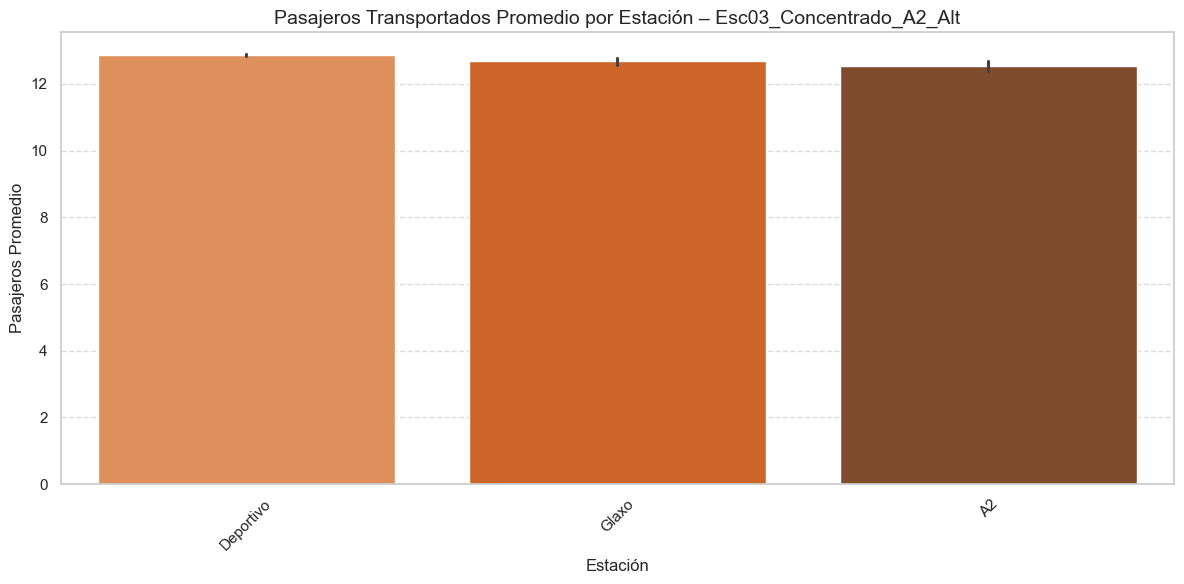

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


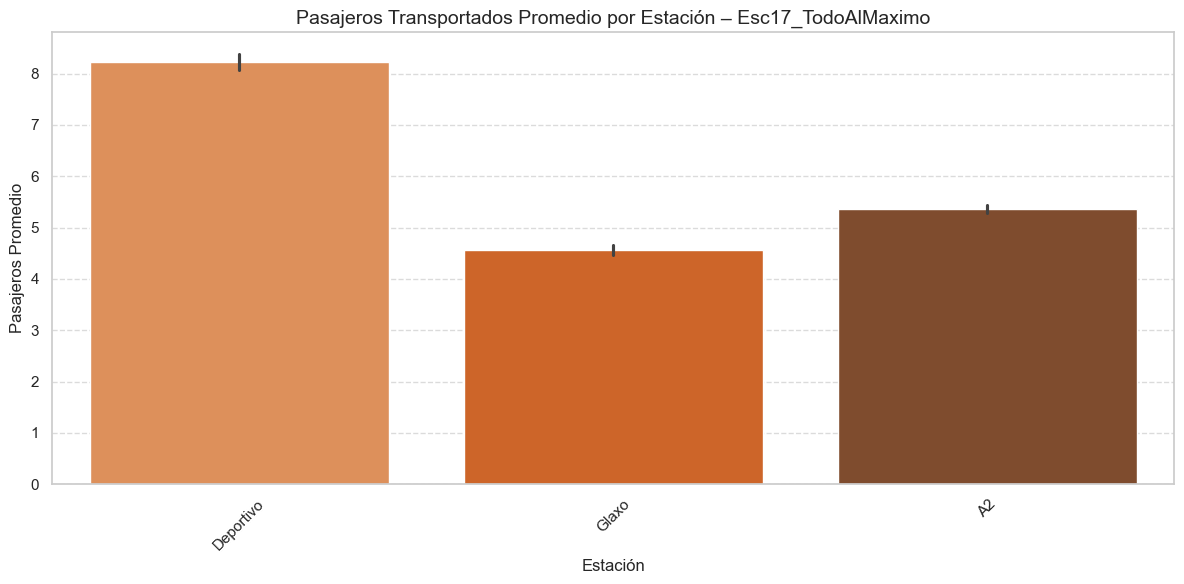

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


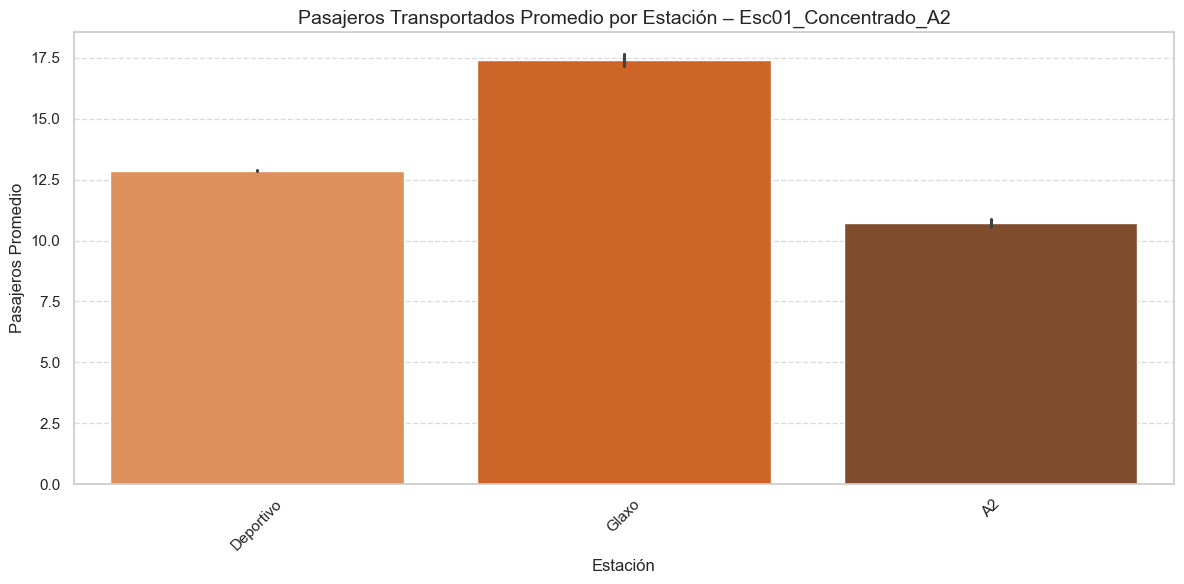

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


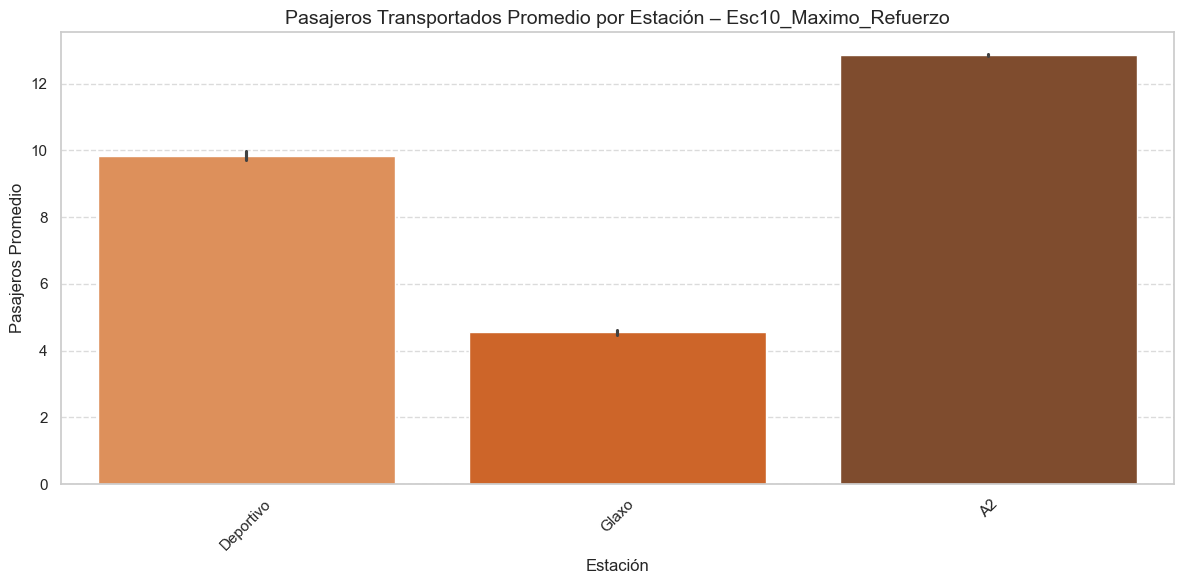

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


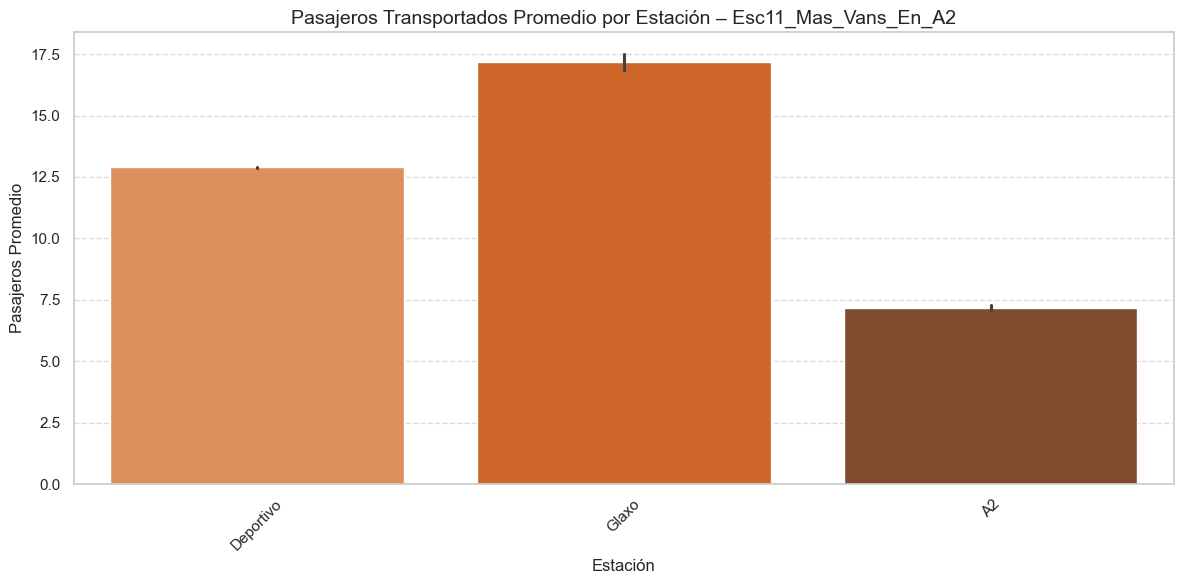

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


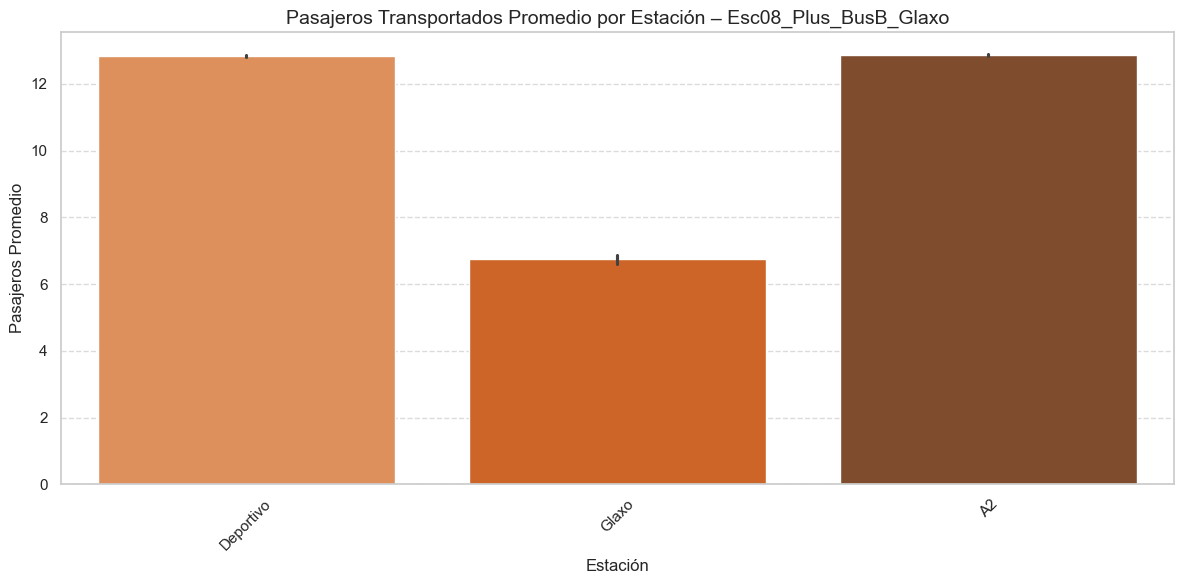

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


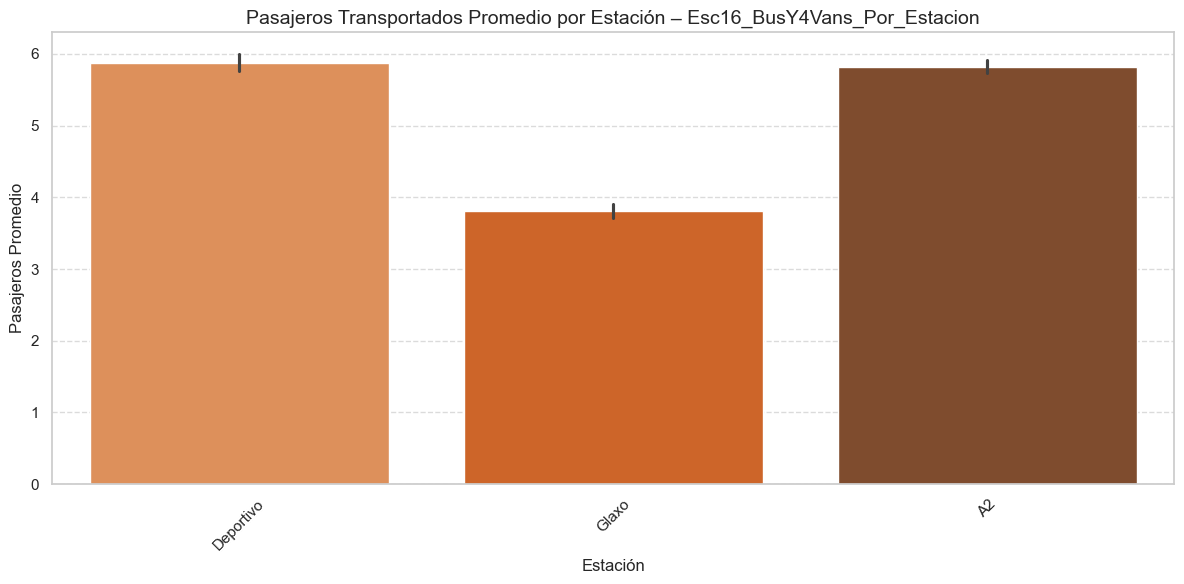

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


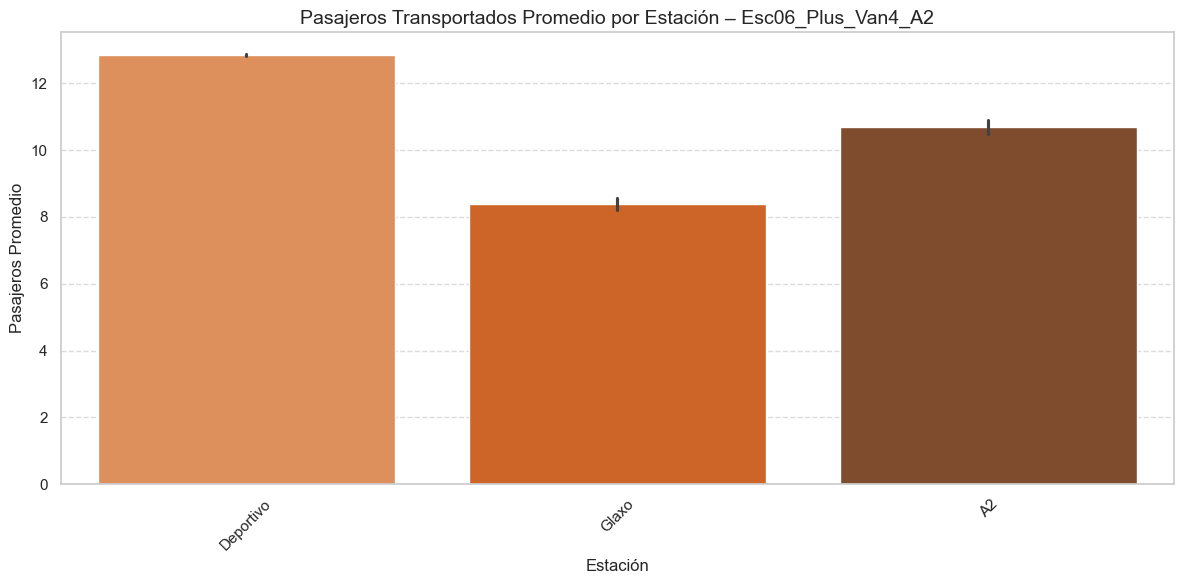

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


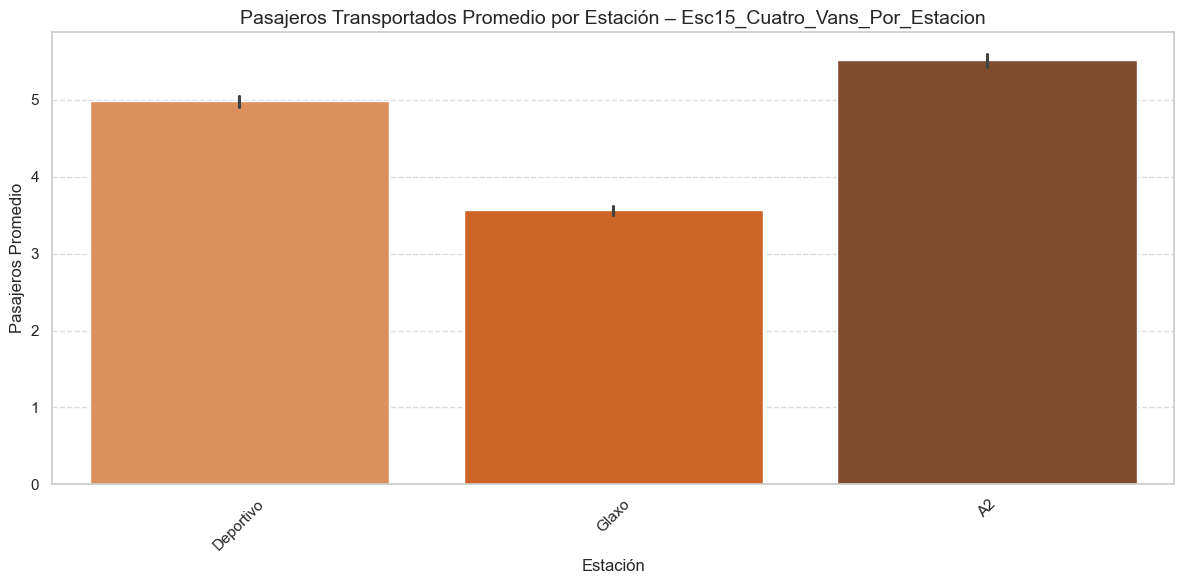

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


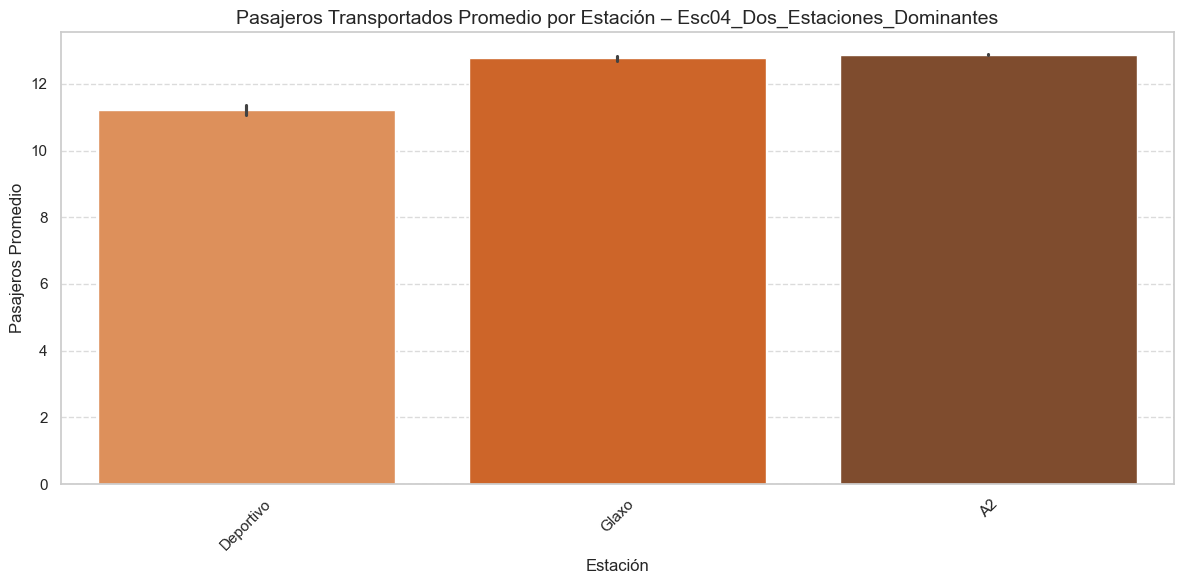

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


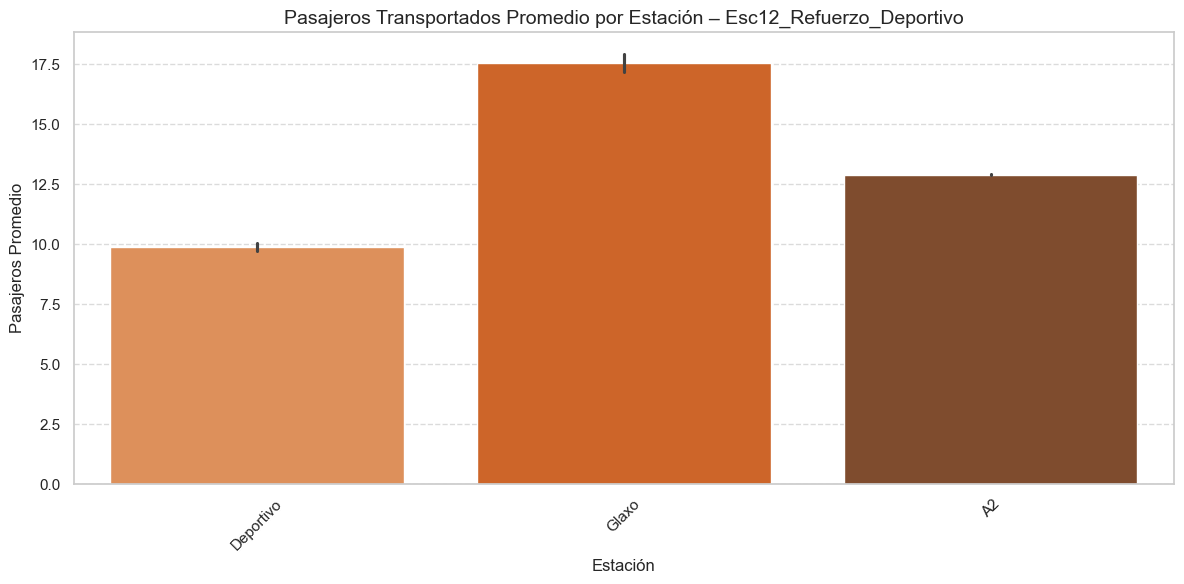

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


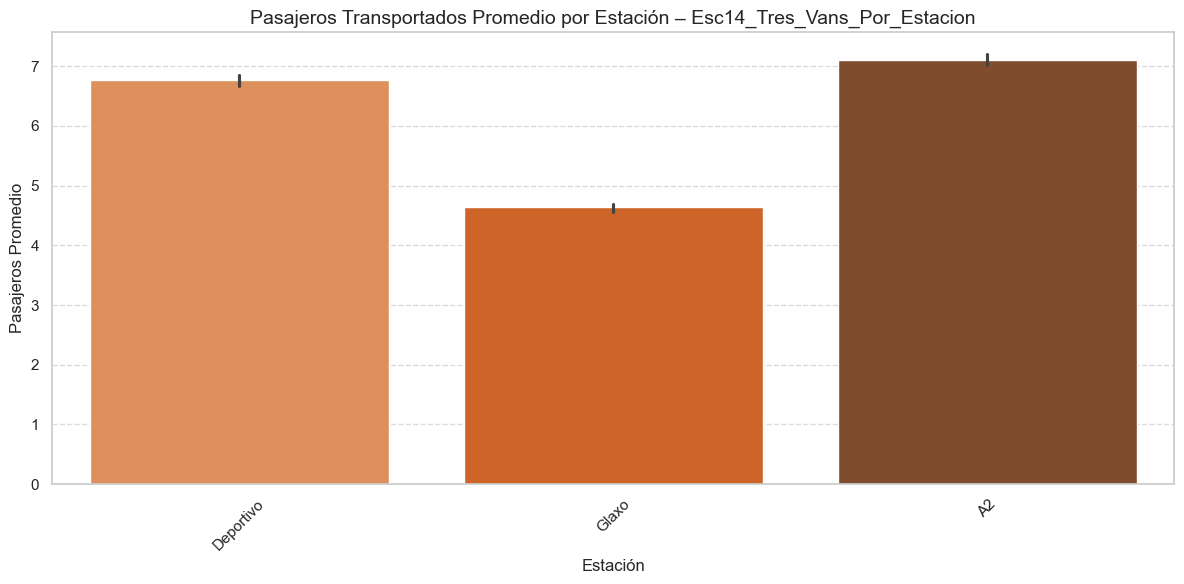

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


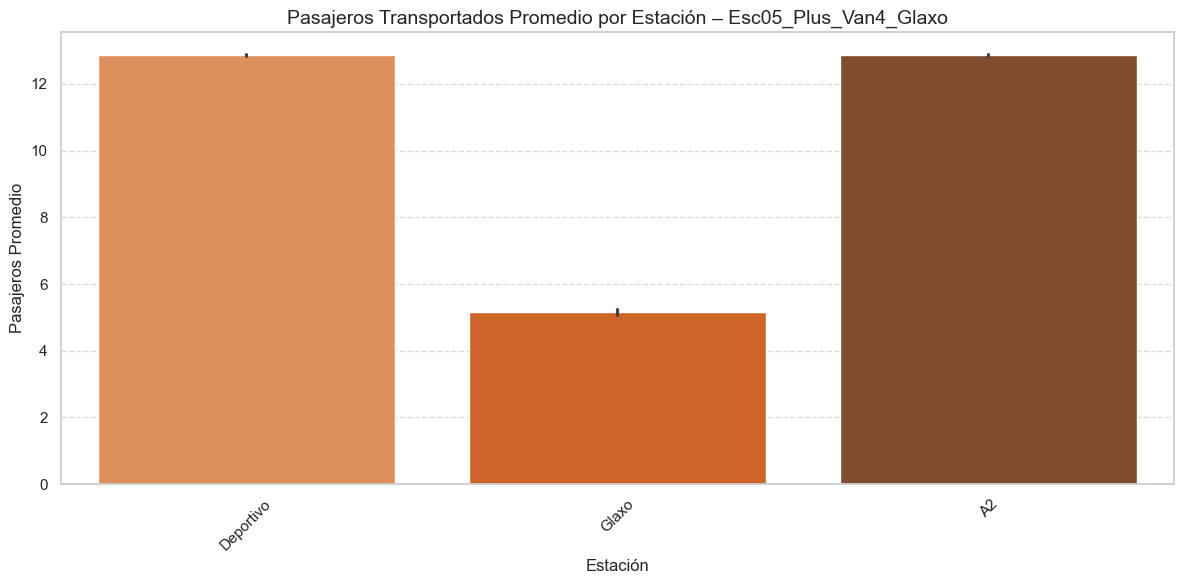

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


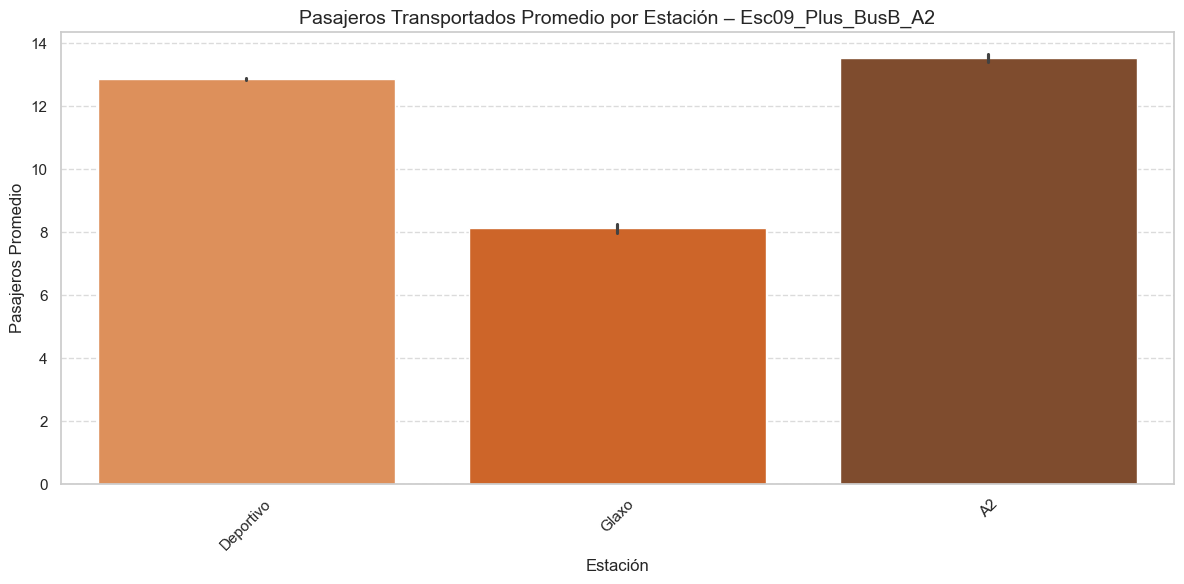

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_24416/2861596432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


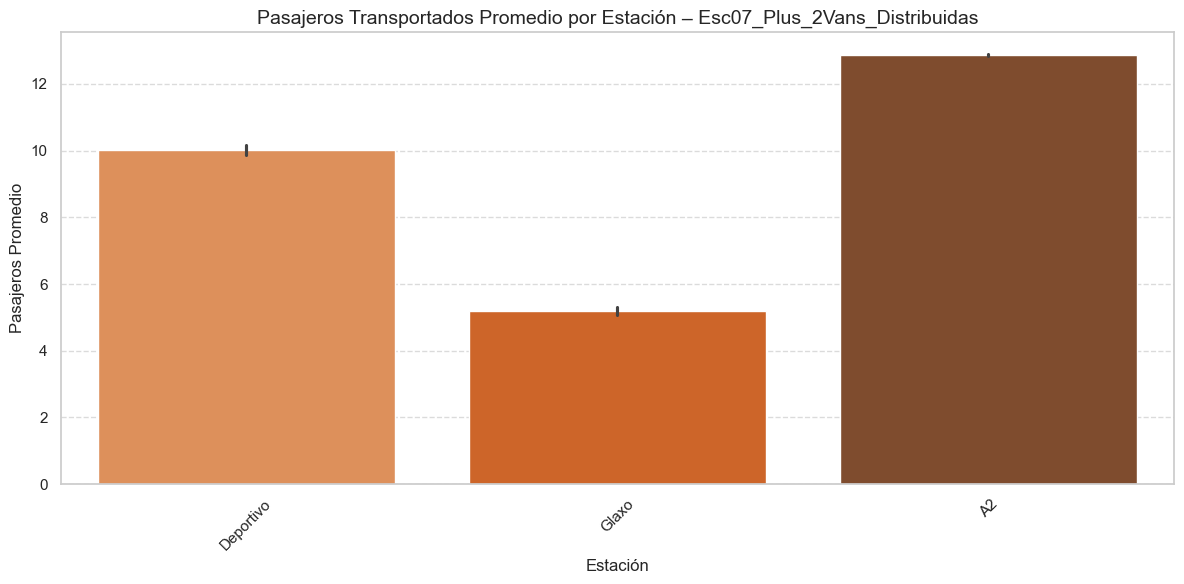

In [42]:
for escenario in escenarios_unicos:
    df_esc = df_total[df_total["Escenario"] == escenario]

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_esc,
        x="Estacion",
        y="Pasajeros_Transportados_Promedio",
        palette="Oranges_d"
    )
    plt.title(f"Pasajeros Transportados Promedio por Estación – {escenario}", fontsize=14)
    plt.xlabel("Estación")
    plt.ylabel("Pasajeros Promedio")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
